# An Analysis of Correlation in the Bitcoin Market: US Stock Market and Consumer Confidence Index

In this project, we are analyzing the Bitcoin market, the US stock market or S&P 500 and Consumer Confidence Index data in a 5-year time frame, 2016 - 2020. 


Below are the questions that we are trying to answer:

*   Is there a correlation between Bitcoin and the US stock market?
*   Is there a correlation between Bitcoin and the Consumer Price Index?
*   Is there a correlation between the US stock market and the Consumer Price Index?


We will also explore the change in price and moving averages of daily returns and price in the Bitcoin and S&P 500 market.

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
# Python data analysis imports
import pandas as pd
import numpy as np
from scipy import stats

# Visualization imports
from matplotlib import pyplot as plt
%matplotlib inline
import seaborn as sns 
sns.set()

from matplotlib.ticker import FuncFormatter

import warnings
warnings.filterwarnings('ignore')

In [ ]:
# Csv data imports
bitcoin_df = pd.read_csv('/content/gdrive/My Drive/python_for_data_analysts/Capstone 3 Dataset/bitcoin.csv')
sp500_df = pd.read_csv('/content/gdrive/My Drive/python_for_data_analysts/Capstone 3 Dataset/sp500.csv')
cci_df = pd.read_csv('/content/gdrive/My Drive/python_for_data_analysts/Capstone 3 Dataset/cci_16_20.csv')

# Data Cleaning 


## Bitcoin

In [ ]:
bitcoin_df.head()

,Name,Symbol,Date,High,Low,Open,Close,Return,Volume,Marketcap
0,Bitcoin,BTC,"Fri, Jan/01/2016",436.246002,427.515015,430.721008,434.334015,NaN,36278900,6.529300e+09
1,Bitcoin,BTC,"Sat, Jan/02/2016",436.062012,431.869995,434.622009,433.437988,-0.0021,30096600,6.517390e+09
2,Bitcoin,BTC,"Sun, Jan/03/2016",433.743012,424.705994,433.578003,430.010986,-0.0079,39633800,6.467430e+09
3,Bitcoin,BTC,"Mon, Jan/04/2016",434.516998,429.084015,430.061005,433.091003,0.0072,38477500,6.515713e+09
4,Bitcoin,BTC,"Tue, Jan/05/2016",434.182007,429.675995,433.069000,431.959992,-0.0026,34522600,6.500393e+09


In [ ]:
# Basic info about the dataframe
bitcoin_df.info()
bitcoin_df.shape

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1827 entries, 0 to 1826
Data columns (total 10 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Name       1827 non-null   object 
 1   Symbol     1827 non-null   object 
 2   Date       1827 non-null   object 
 3   High       1827 non-null   float64
 4   Low        1827 non-null   float64
 5   Open       1827 non-null   float64
 6   Close      1827 non-null   float64
 7   Return     1826 non-null   float64
 8   Volume     1827 non-null   int64  
 9   Marketcap  1827 non-null   float64
dtypes: float64(6), int64(1), object(3)
memory usage: 142.9+ KB


(1827, 10)

The data type for the variable, `Date`, needs to be changed. 

In [ ]:
bitcoin_df['Date'] = pd.to_datetime(bitcoin_df.Date)
bitcoin_df.info()
bitcoin_df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1827 entries, 0 to 1826
Data columns (total 10 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   Name       1827 non-null   object        
 1   Symbol     1827 non-null   object        
 2   Date       1827 non-null   datetime64[ns]
 3   High       1827 non-null   float64       
 4   Low        1827 non-null   float64       
 5   Open       1827 non-null   float64       
 6   Close      1827 non-null   float64       
 7   Return     1826 non-null   float64       
 8   Volume     1827 non-null   int64         
 9   Marketcap  1827 non-null   float64       
dtypes: datetime64[ns](1), float64(6), int64(1), object(2)
memory usage: 142.9+ KB


,Name,Symbol,Date,High,Low,Open,Close,Return,Volume,Marketcap
0,Bitcoin,BTC,2016-01-01,436.246002,427.515015,430.721008,434.334015,NaN,36278900,6.529300e+09
1,Bitcoin,BTC,2016-01-02,436.062012,431.869995,434.622009,433.437988,-0.0021,30096600,6.517390e+09
2,Bitcoin,BTC,2016-01-03,433.743012,424.705994,433.578003,430.010986,-0.0079,39633800,6.467430e+09
3,Bitcoin,BTC,2016-01-04,434.516998,429.084015,430.061005,433.091003,0.0072,38477500,6.515713e+09
4,Bitcoin,BTC,2016-01-05,434.182007,429.675995,433.069000,431.959992,-0.0026,34522600,6.500393e+09


## S&P 500

In [ ]:
sp500_df.head()

,Name,Date,Open,High,Low,Close,Adj Close,Return,Volume
0,S&P 500,"Mon, Jan/04/2016",2038.20,2038.20,1989.68,2012.66,2012.66,NaN,4304880000
1,S&P 500,"Tue, Jan/05/2016",2013.78,2021.94,2004.17,2016.71,2016.71,0.0020,3706620000
2,S&P 500,"Wed, Jan/06/2016",2011.71,2011.71,1979.05,1990.26,1990.26,-0.0131,4336660000
3,S&P 500,"Thu, Jan/07/2016",1985.32,1985.32,1938.83,1943.09,1943.09,-0.0237,5076590000
4,S&P 500,"Fri, Jan/08/2016",1945.97,1960.40,1918.46,1922.03,1922.03,-0.0108,4664940000


In [ ]:
# Basic info about the dataframe
sp500_df.info()
sp500_df.shape

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1259 entries, 0 to 1258
Data columns (total 9 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Name       1259 non-null   object 
 1   Date       1259 non-null   object 
 2   Open       1259 non-null   float64
 3   High       1259 non-null   float64
 4   Low        1259 non-null   float64
 5   Close      1259 non-null   float64
 6   Adj Close  1259 non-null   float64
 7   Return     1258 non-null   float64
 8   Volume     1259 non-null   int64  
dtypes: float64(6), int64(1), object(2)
memory usage: 88.6+ KB


(1259, 9)

The data type for the variable, `Date`, needs to be changed. 

In [ ]:
sp500_df['Date'] = pd.to_datetime(sp500_df.Date)
sp500_df.info()
sp500_df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1259 entries, 0 to 1258
Data columns (total 9 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   Name       1259 non-null   object        
 1   Date       1259 non-null   datetime64[ns]
 2   Open       1259 non-null   float64       
 3   High       1259 non-null   float64       
 4   Low        1259 non-null   float64       
 5   Close      1259 non-null   float64       
 6   Adj Close  1259 non-null   float64       
 7   Return     1258 non-null   float64       
 8   Volume     1259 non-null   int64         
dtypes: datetime64[ns](1), float64(6), int64(1), object(1)
memory usage: 88.6+ KB


,Name,Date,Open,High,Low,Close,Adj Close,Return,Volume
0,S&P 500,2016-01-04,2038.20,2038.20,1989.68,2012.66,2012.66,NaN,4304880000
1,S&P 500,2016-01-05,2013.78,2021.94,2004.17,2016.71,2016.71,0.0020,3706620000
2,S&P 500,2016-01-06,2011.71,2011.71,1979.05,1990.26,1990.26,-0.0131,4336660000
3,S&P 500,2016-01-07,1985.32,1985.32,1938.83,1943.09,1943.09,-0.0237,5076590000
4,S&P 500,2016-01-08,1945.97,1960.40,1918.46,1922.03,1922.03,-0.0108,4664940000


## Merge Bitcoin and S&P 500 Data

In [ ]:
# left merge S&P 500 and Bitcoin dataframes
df1 = pd.merge(sp500_df, bitcoin_df, how = 'left', left_on = ['Date'], right_on = ['Date'])
df1.shape

(1259, 18)

There are only 1,259 observations, because the US stock market closes on weekends and during national holidays, while the Bitcoin market opens 24/7. 

In [ ]:
df1.head(10)

,Name_x,Date,Open_x,High_x,Low_x,Close_x,Adj Close,Return_x,Volume_x,Name_y,Symbol,High_y,Low_y,Open_y,Close_y,Return_y,Volume_y,Marketcap
0,S&P 500,2016-01-04,2038.20,2038.20,1989.68,2012.66,2012.66,NaN,4304880000,Bitcoin,BTC,434.516998,429.084015,430.061005,433.091003,0.0072,38477500,6.515713e+09
1,S&P 500,2016-01-05,2013.78,2021.94,2004.17,2016.71,2016.71,0.0020,3706620000,Bitcoin,BTC,434.182007,429.675995,433.069000,431.959992,-0.0026,34522600,6.500393e+09
2,S&P 500,2016-01-06,2011.71,2011.71,1979.05,1990.26,1990.26,-0.0131,4336660000,Bitcoin,BTC,431.855988,426.341003,431.855988,429.105011,-0.0066,34042500,6.458942e+09
3,S&P 500,2016-01-07,1985.32,1985.32,1938.83,1943.09,1943.09,-0.0237,5076590000,Bitcoin,BTC,458.765991,429.076996,430.010986,458.048004,0.0674,87562200,6.896279e+09
4,S&P 500,2016-01-08,1945.97,1960.40,1918.46,1922.03,1922.03,-0.0108,4664940000,Bitcoin,BTC,462.933991,447.937988,457.537994,453.230011,-0.0105,56993000,6.825700e+09
5,S&P 500,2016-01-11,1926.12,1935.65,1901.10,1923.67,1923.67,0.0009,4607290000,Bitcoin,BTC,450.661987,443.855011,448.697998,448.428009,0.0010,40450000,6.758931e+09
6,S&P 500,2016-01-12,1927.83,1947.38,1914.35,1938.68,1938.68,0.0078,4887260000,Bitcoin,BTC,448.182007,435.690002,448.182007,435.690002,-0.0284,115607000,6.568800e+09
7,S&P 500,2016-01-13,1940.34,1950.33,1886.41,1890.28,1890.28,-0.0250,5087030000,Bitcoin,BTC,435.186005,424.442993,434.665008,432.371002,-0.0076,173888000,6.520360e+09
8,S&P 500,2016-01-14,1891.68,1934.47,1878.93,1921.84,1921.84,0.0167,5241110000,Bitcoin,BTC,433.324005,427.845001,432.287994,430.306000,-0.0048,43945500,6.490639e+09
9,S&P 500,2016-01-15,1916.68,1916.68,1857.83,1880.33,1880.33,-0.0216,5468460000,Bitcoin,BTC,430.255005,364.330994,430.255005,364.330994,-0.1533,153351008,5.496598e+09


Drop null value or index 0 from the dataframe, where daily return or `Return_x` is NaN. 

In [ ]:
df_btc_sp500 = df1.dropna()
null_rows = df_btc_sp500[df_btc_sp500.isnull().any(axis = 1)]
null_rows.head() # Check for null values

,Name_x,Date,Open_x,High_x,Low_x,Close_x,Adj Close,Return_x,Volume_x,Name_y,Symbol,High_y,Low_y,Open_y,Close_y,Return_y,Volume_y,Marketcap


In [ ]:
# Basic info about the dataframe
df_btc_sp500.info()
df_btc_sp500.shape

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1258 entries, 1 to 1258
Data columns (total 18 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   Name_x     1258 non-null   object        
 1   Date       1258 non-null   datetime64[ns]
 2   Open_x     1258 non-null   float64       
 3   High_x     1258 non-null   float64       
 4   Low_x      1258 non-null   float64       
 5   Close_x    1258 non-null   float64       
 6   Adj Close  1258 non-null   float64       
 7   Return_x   1258 non-null   float64       
 8   Volume_x   1258 non-null   int64         
 9   Name_y     1258 non-null   object        
 10  Symbol     1258 non-null   object        
 11  High_y     1258 non-null   float64       
 12  Low_y      1258 non-null   float64       
 13  Open_y     1258 non-null   float64       
 14  Close_y    1258 non-null   float64       
 15  Return_y   1258 non-null   float64       
 16  Volume_y   1258 non-null   int64         


(1258, 18)

Now there is no null values in the dataframe from above, so we can go about with the analysis.  

## Consumer Confidence Index 

Consumer Confidence Index is a survey that is administered by the Conference Board which measures optimism and pessimism of consumers regarding their financial situations. If consumers are optimistic, they will generally spend more and stimulate the economy, and vice versa. 

In [ ]:
cci_df.head()

,Month_Year,Actual,Change
0,December-2020,88.6,-0.078044
1,November-2020,96.1,-0.047572
2,October-2020,100.9,-0.008841
3,September-2020,101.8,0.200472
4,August-2020,84.8,-0.084233


The Consumer Condifence Index is measured or adjusted monthly based on the results of a household survey. 

In [ ]:
# Basic info about the dataframe
cci_df.info()
cci_df.shape

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 61 entries, 0 to 60
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Month_Year  61 non-null     object 
 1   Actual      61 non-null     float64
 2   Change      60 non-null     float64
dtypes: float64(2), object(1)
memory usage: 1.6+ KB


(61, 3)

The data type for the variable, `Month_Year`, needs to be changed. 

In [ ]:
cci_df['Month_Year'] = pd.to_datetime(cci_df.Month_Year)
cci_df.info()
cci_df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 61 entries, 0 to 60
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   Month_Year  61 non-null     datetime64[ns]
 1   Actual      61 non-null     float64       
 2   Change      60 non-null     float64       
dtypes: datetime64[ns](1), float64(2)
memory usage: 1.6 KB


,Month_Year,Actual,Change
0,2020-12-01,88.6,-0.078044
1,2020-11-01,96.1,-0.047572
2,2020-10-01,100.9,-0.008841
3,2020-09-01,101.8,0.200472
4,2020-08-01,84.8,-0.084233


### Merge Bitcoin and Consumer Confidence Index Data

Since the values in the Consumer Confidence Index are measured monthly (first day of every month), we need to make sure that the Bitcoin data is grouped the same way before merging the data. 

In [ ]:
# The first day of every month in the Bitcoin dataframe
bitcoin_first_m = bitcoin_df[bitcoin_df['Date'].dt.day==1]
bitcoin_first_m.head()

,Name,Symbol,Date,High,Low,Open,Close,Return,Volume,Marketcap
0,Bitcoin,BTC,2016-01-01,436.246002,427.515015,430.721008,434.334015,NaN,36278900,6.529300e+09
31,Bitcoin,BTC,2016-02-01,378.071991,367.957001,369.350006,373.056000,0.0116,51656700,5.653748e+09
60,Bitcoin,BTC,2016-03-01,439.653015,432.319000,437.916992,435.122986,-0.0059,74895800,6.643686e+09
91,Bitcoin,BTC,2016-04-01,418.173004,415.830994,416.760010,417.959992,0.0030,51235700,6.429594e+09
121,Bitcoin,BTC,2016-05-01,452.479004,447.927002,448.484009,451.875000,0.0079,40660100,7.001713e+09


In [ ]:
# Calculate the % change of the closing price from the first day of the previous month
bitcoin_first_m['Return_First_Month'] = bitcoin_first_m['Close'].pct_change()

In [ ]:
bitcoin_first_m.head()

,Name,Symbol,Date,High,Low,Open,Close,Return,Volume,Marketcap,Return_First_Month
0,Bitcoin,BTC,2016-01-01,436.246002,427.515015,430.721008,434.334015,NaN,36278900,6.529300e+09,NaN
31,Bitcoin,BTC,2016-02-01,378.071991,367.957001,369.350006,373.056000,0.0116,51656700,5.653748e+09,-0.141085
60,Bitcoin,BTC,2016-03-01,439.653015,432.319000,437.916992,435.122986,-0.0059,74895800,6.643686e+09,0.166374
91,Bitcoin,BTC,2016-04-01,418.173004,415.830994,416.760010,417.959992,0.0030,51235700,6.429594e+09,-0.039444
121,Bitcoin,BTC,2016-05-01,452.479004,447.927002,448.484009,451.875000,0.0079,40660100,7.001713e+09,0.081144


In [ ]:
# Merging the dataframes 
df2 = pd.merge(bitcoin_first_m, cci_df, how = 'left', left_on = ['Date'], right_on = ['Month_Year'])
df2.shape

(60, 14)

In [ ]:
df2.head()

,Name,Symbol,Date,High,Low,Open,Close,Return,Volume,Marketcap,Return_First_Month,Month_Year,Actual,Change
0,Bitcoin,BTC,2016-01-01,436.246002,427.515015,430.721008,434.334015,NaN,36278900,6.529300e+09,NaN,2016-01-01,98.1,0.016580
1,Bitcoin,BTC,2016-02-01,378.071991,367.957001,369.350006,373.056000,0.0116,51656700,5.653748e+09,-0.141085,2016-02-01,92.2,-0.060143
2,Bitcoin,BTC,2016-03-01,439.653015,432.319000,437.916992,435.122986,-0.0059,74895800,6.643686e+09,0.166374,2016-03-01,96.2,0.043384
3,Bitcoin,BTC,2016-04-01,418.173004,415.830994,416.760010,417.959992,0.0030,51235700,6.429594e+09,-0.039444,2016-04-01,94.2,-0.020790
4,Bitcoin,BTC,2016-05-01,452.479004,447.927002,448.484009,451.875000,0.0079,40660100,7.001713e+09,0.081144,2016-05-01,92.6,-0.016985


In [ ]:
# Check to make sure that we capture all the months and years 
df2['Month_Year'].isna().sum()

0

Drop null value or index 0 from the dataframe, where the return is NaN. 

In [ ]:
df_btc_cci = df2.drop(df2.index[[0]])
df_btc_cci.head()

,Name,Symbol,Date,High,Low,Open,Close,Return,Volume,Marketcap,Return_First_Month,Month_Year,Actual,Change
1,Bitcoin,BTC,2016-02-01,378.071991,367.957001,369.350006,373.056000,0.0116,51656700,5.653748e+09,-0.141085,2016-02-01,92.2,-0.060143
2,Bitcoin,BTC,2016-03-01,439.653015,432.319000,437.916992,435.122986,-0.0059,74895800,6.643686e+09,0.166374,2016-03-01,96.2,0.043384
3,Bitcoin,BTC,2016-04-01,418.173004,415.830994,416.760010,417.959992,0.0030,51235700,6.429594e+09,-0.039444,2016-04-01,94.2,-0.020790
4,Bitcoin,BTC,2016-05-01,452.479004,447.927002,448.484009,451.875000,0.0079,40660100,7.001713e+09,0.081144,2016-05-01,92.6,-0.016985
5,Bitcoin,BTC,2016-06-01,543.080017,525.635986,531.106995,536.919983,0.0104,86061800,8.381321e+09,0.188205,2016-06-01,98.0,0.058315


### Merge S&P 500 and Consumer Confidence Index Data

Since the values in the Consumer Confidence Index are measured monthly (first day of every month), we need to make sure that the S&P 500 data is grouped the same way before merging the data. 

Unlike the Bitcoin market, the US stock market does not open 24/7. We need to capture and imputate the data that are missing for the first day of every month that falls on a Saturday, Sunday or national holiday before merging the data.

In [ ]:
# Create a dataframe that retrieves all the dates that range from the minimum to the maximum dates in the S&P 500 dataframe
df_date_sp500 = pd.DataFrame({'Date': pd.date_range(start = sp500_df['Date'].min(), end = sp500_df['Date'].max())})

In [ ]:
df_date_sp500.head()

,Date
0,2016-01-04
1,2016-01-05
2,2016-01-06
3,2016-01-07
4,2016-01-08


In [ ]:
# Merge the dates and the S&P 500 dataframes
date_merge = pd.merge(sp500_df, df_date_sp500, how = 'right', right_on = ['Date'], left_on = ['Date'])

In [ ]:
date_merge.head(10)

,Name,Date,Open,High,Low,Close,Adj Close,Return,Volume
0,S&P 500,2016-01-04,2038.20,2038.20,1989.68,2012.66,2012.66,NaN,4.304880e+09
1,S&P 500,2016-01-05,2013.78,2021.94,2004.17,2016.71,2016.71,0.0020,3.706620e+09
2,S&P 500,2016-01-06,2011.71,2011.71,1979.05,1990.26,1990.26,-0.0131,4.336660e+09
3,S&P 500,2016-01-07,1985.32,1985.32,1938.83,1943.09,1943.09,-0.0237,5.076590e+09
4,S&P 500,2016-01-08,1945.97,1960.40,1918.46,1922.03,1922.03,-0.0108,4.664940e+09
5,NaN,2016-01-09,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,NaN,2016-01-10,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,S&P 500,2016-01-11,1926.12,1935.65,1901.10,1923.67,1923.67,0.0009,4.607290e+09
8,S&P 500,2016-01-12,1927.83,1947.38,1914.35,1938.68,1938.68,0.0078,4.887260e+09
9,S&P 500,2016-01-13,1940.34,1950.33,1886.41,1890.28,1890.28,-0.0250,5.087030e+09


In [ ]:
# Imputate the missing values for each variable
date_merge = date_merge.fillna(method = 'pad')

We are assuming that the adjusted closing price for Saturday and Sunday will be the same as the adjusted closing price for that Friday. 

In [ ]:
date_merge.head(20)

,Name,Date,Open,High,Low,Close,Adj Close,Return,Volume
0,S&P 500,2016-01-04,2038.20,2038.20,1989.68,2012.66,2012.66,NaN,4.304880e+09
1,S&P 500,2016-01-05,2013.78,2021.94,2004.17,2016.71,2016.71,0.0020,3.706620e+09
2,S&P 500,2016-01-06,2011.71,2011.71,1979.05,1990.26,1990.26,-0.0131,4.336660e+09
3,S&P 500,2016-01-07,1985.32,1985.32,1938.83,1943.09,1943.09,-0.0237,5.076590e+09
4,S&P 500,2016-01-08,1945.97,1960.40,1918.46,1922.03,1922.03,-0.0108,4.664940e+09
5,S&P 500,2016-01-09,1945.97,1960.40,1918.46,1922.03,1922.03,-0.0108,4.664940e+09
6,S&P 500,2016-01-10,1945.97,1960.40,1918.46,1922.03,1922.03,-0.0108,4.664940e+09
7,S&P 500,2016-01-11,1926.12,1935.65,1901.10,1923.67,1923.67,0.0009,4.607290e+09
8,S&P 500,2016-01-12,1927.83,1947.38,1914.35,1938.68,1938.68,0.0078,4.887260e+09
9,S&P 500,2016-01-13,1940.34,1950.33,1886.41,1890.28,1890.28,-0.0250,5.087030e+09


In [ ]:
# The first day of every month in the S&P 500 dataframe
sp500_first_m = date_merge[date_merge['Date'].dt.day==1]
sp500_first_m.head(10)

,Name,Date,Open,High,Low,Close,Adj Close,Return,Volume
28,S&P 500,2016-02-01,1936.94,1947.20,1920.30,1939.38,1939.38,-0.0004,4.322530e+09
57,S&P 500,2016-03-01,1937.09,1978.35,1937.09,1978.35,1978.35,0.0239,4.819750e+09
88,S&P 500,2016-04-01,2056.62,2075.07,2043.98,2072.78,2072.78,0.0063,3.749990e+09
118,S&P 500,2016-05-01,2071.82,2073.85,2052.28,2065.30,2065.30,-0.0051,4.704720e+09
149,S&P 500,2016-06-01,2093.94,2100.97,2085.10,2099.33,2099.33,0.0011,3.525170e+09
179,S&P 500,2016-07-01,2099.34,2108.71,2097.90,2102.95,2102.95,0.0019,3.458890e+09
210,S&P 500,2016-08-01,2173.15,2178.29,2166.21,2170.84,2170.84,-0.0013,3.505990e+09
241,S&P 500,2016-09-01,2171.33,2173.56,2157.09,2170.86,2170.86,0.0000,3.392120e+09
271,S&P 500,2016-10-01,2156.51,2175.30,2156.51,2168.27,2168.27,0.0080,4.173340e+09
302,S&P 500,2016-11-01,2128.68,2131.45,2097.85,2111.72,2111.72,-0.0068,4.532160e+09


In [ ]:
# Calculate the % change of the adjusted closing price from the first day of the previous month
sp500_first_m['Return_First_Month'] = sp500_first_m['Adj Close'].pct_change()
sp500_first_m.head()

,Name,Date,Open,High,Low,Close,Adj Close,Return,Volume,Return_First_Month
28,S&P 500,2016-02-01,1936.94,1947.20,1920.30,1939.38,1939.38,-0.0004,4.322530e+09,NaN
57,S&P 500,2016-03-01,1937.09,1978.35,1937.09,1978.35,1978.35,0.0239,4.819750e+09,0.020094
88,S&P 500,2016-04-01,2056.62,2075.07,2043.98,2072.78,2072.78,0.0063,3.749990e+09,0.047732
118,S&P 500,2016-05-01,2071.82,2073.85,2052.28,2065.30,2065.30,-0.0051,4.704720e+09,-0.003609
149,S&P 500,2016-06-01,2093.94,2100.97,2085.10,2099.33,2099.33,0.0011,3.525170e+09,0.016477


In [ ]:
# Merge the S&P 500 and Consumer Confidence Index dataframes
df3 = pd.merge(sp500_first_m, cci_df, how = 'left', left_on = ['Date'], right_on = ['Month_Year'])
df3.shape

(59, 13)

In [ ]:
df3.head()

,Name,Date,Open,High,Low,Close,Adj Close,Return,Volume,Return_First_Month,Month_Year,Actual,Change
0,S&P 500,2016-02-01,1936.94,1947.20,1920.30,1939.38,1939.38,-0.0004,4.322530e+09,NaN,2016-02-01,92.2,-0.060143
1,S&P 500,2016-03-01,1937.09,1978.35,1937.09,1978.35,1978.35,0.0239,4.819750e+09,0.020094,2016-03-01,96.2,0.043384
2,S&P 500,2016-04-01,2056.62,2075.07,2043.98,2072.78,2072.78,0.0063,3.749990e+09,0.047732,2016-04-01,94.2,-0.020790
3,S&P 500,2016-05-01,2071.82,2073.85,2052.28,2065.30,2065.30,-0.0051,4.704720e+09,-0.003609,2016-05-01,92.6,-0.016985
4,S&P 500,2016-06-01,2093.94,2100.97,2085.10,2099.33,2099.33,0.0011,3.525170e+09,0.016477,2016-06-01,98.0,0.058315


Drop null value or index 0 from the dataframe, where the return is NaN. 

In [ ]:
df_sp500_cci = df3.drop(df3.index[[0]])
df_sp500_cci.head()

,Name,Date,Open,High,Low,Close,Adj Close,Return,Volume,Return_First_Month,Month_Year,Actual,Change
1,S&P 500,2016-03-01,1937.09,1978.35,1937.09,1978.35,1978.35,0.0239,4.819750e+09,0.020094,2016-03-01,96.2,0.043384
2,S&P 500,2016-04-01,2056.62,2075.07,2043.98,2072.78,2072.78,0.0063,3.749990e+09,0.047732,2016-04-01,94.2,-0.020790
3,S&P 500,2016-05-01,2071.82,2073.85,2052.28,2065.30,2065.30,-0.0051,4.704720e+09,-0.003609,2016-05-01,92.6,-0.016985
4,S&P 500,2016-06-01,2093.94,2100.97,2085.10,2099.33,2099.33,0.0011,3.525170e+09,0.016477,2016-06-01,98.0,0.058315
5,S&P 500,2016-07-01,2099.34,2108.71,2097.90,2102.95,2102.95,0.0019,3.458890e+09,0.001724,2016-07-01,97.3,-0.007143


# Data Exploratory

## Bitcoin and S&P 500

### Descriptive Statistics

Includes minimum, maximum, average prices, and volume traded from 2016 - 2020. 

In [ ]:
bitcoin_df.describe()

,High,Low,Open,Close,Return,Volume,Marketcap
count,1827.000000,1827.000000,1827.000000,1827.000000,1826.000000,1.827000e+03,1.827000e+03
mean,6271.882589,5957.741736,6115.829121,6131.373224,0.003078,1.166258e+10,1.082966e+11
std,4848.799870,4564.046570,4703.780161,4732.385618,0.039160,1.378776e+10,8.604825e+10
min,374.950012,354.914002,365.072998,364.330994,-0.371700,2.851400e+07,5.496598e+09
25%,1206.515015,1172.234985,1185.275024,1187.840027,-0.011200,3.349970e+08,1.928824e+10
50%,6535.410000,6316.880000,6413.630000,6416.314758,0.002200,5.302482e+09,1.110000e+11
75%,9364.546899,9038.571512,9213.466897,9218.806509,0.017575,1.901308e+10,1.660000e+11
max,29244.876690,28201.991990,28841.573760,29001.719820,0.252500,7.415677e+10,5.390000e+11


In [ ]:
sp500_df.describe()

,Open,High,Low,Close,Adj Close,Return,Volume
count,1259.000000,1259.000000,1259.000000,1259.000000,1259.000000,1258.000000,1.259000e+03
mean,2684.491573,2697.794432,2669.708539,2684.792208,2684.792208,0.000569,3.879487e+09
std,424.965503,427.598142,422.412476,424.962789,424.962789,0.012111,1.001714e+09
min,1833.400000,1847.000000,1810.100000,1829.080000,1829.080000,-0.119800,1.296540e+09
25%,2365.655000,2372.315000,2353.740000,2364.340000,2364.340000,-0.002900,3.297235e+09
50%,2713.460000,2729.340000,2697.770000,2711.930000,2711.930000,0.000700,3.638390e+09
75%,2931.315000,2945.660000,2918.565000,2935.730000,2935.730000,0.005300,4.148940e+09
max,3750.010000,3760.200000,3730.210000,3756.070000,3756.070000,0.093800,9.044690e+09


### The Change in Bitcoin and S&P 500 Prices

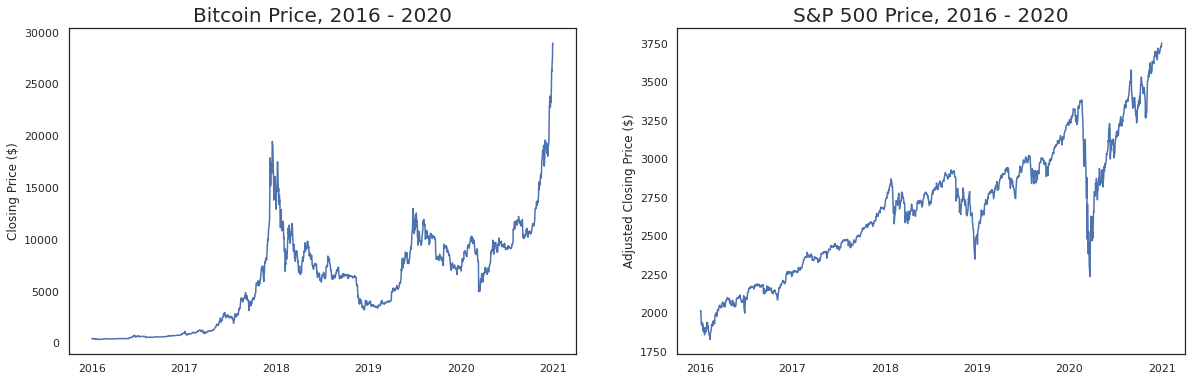

In [ ]:
# Plot Bitcoin closing price and S&P 500 adjusted closing price 
sns.set_style('white')
fig, axes = plt.subplots(nrows = 1, ncols = 2, figsize = (20, 6))
axes[0].plot(bitcoin_df['Date'], bitcoin_df['Close'])
axes[0].set_ylabel('Closing Price ($)')
axes[0].set_title('Bitcoin Price, 2016 - 2020', size = 20)
axes[1].plot(sp500_df['Date'], sp500_df['Adj Close'])
axes[1].set_ylabel('Adjusted Closing Price ($)')
axes[1].set_title('S&P 500 Price, 2016 - 2020', size = 20)
plt.show()

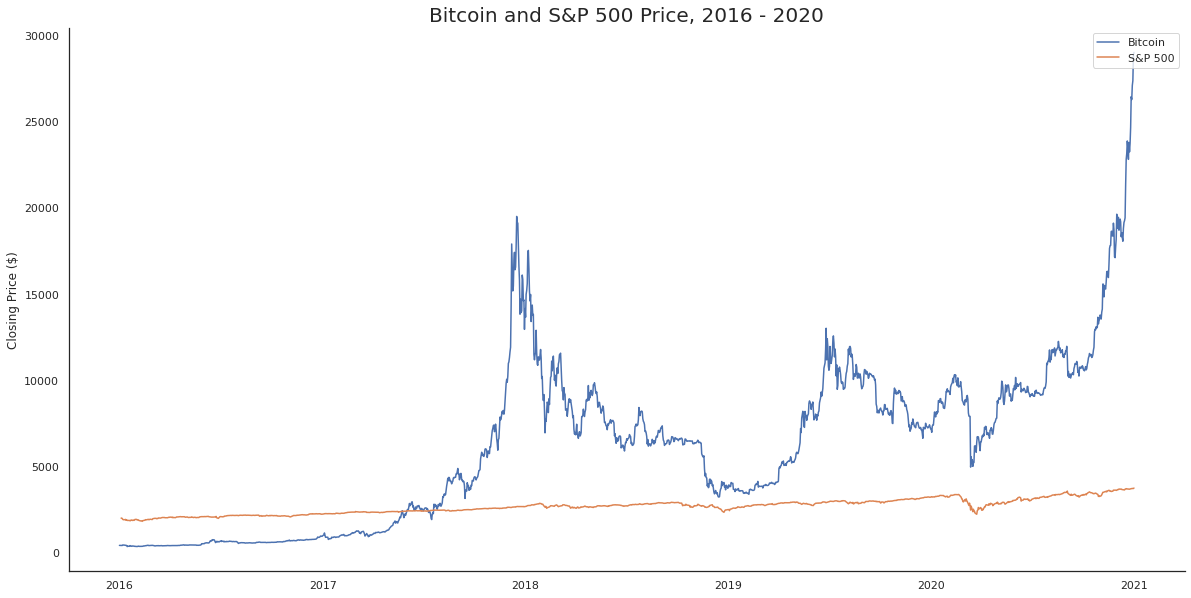

In [ ]:
# Compare Bitcoin closing price and S&P 500 adjusted closing price 
plt.figure(figsize = (20,10))
plt.plot(bitcoin_df['Date'], bitcoin_df['Close'], label = 'Bitcoin')
plt.plot(sp500_df['Date'], sp500_df['Adj Close'], label = 'S&P 500')
plt.ylabel('Closing Price ($)')
plt.title('Bitcoin and S&P 500 Price, 2016 - 2020', size = 20)
plt.legend(loc = 'upper right')
sns.despine()

S&P 500 price seems to be heading in a linear and upward trajectory, while Bitcoin price are more volatile overtime, reaching all time high by the end of 2020. There is also quite a sharp decline in Bitcoin and S&P 500 prices in the early 2019 and 2020. 

### The Change in Bitcoin and S&P 500 Volume Traded

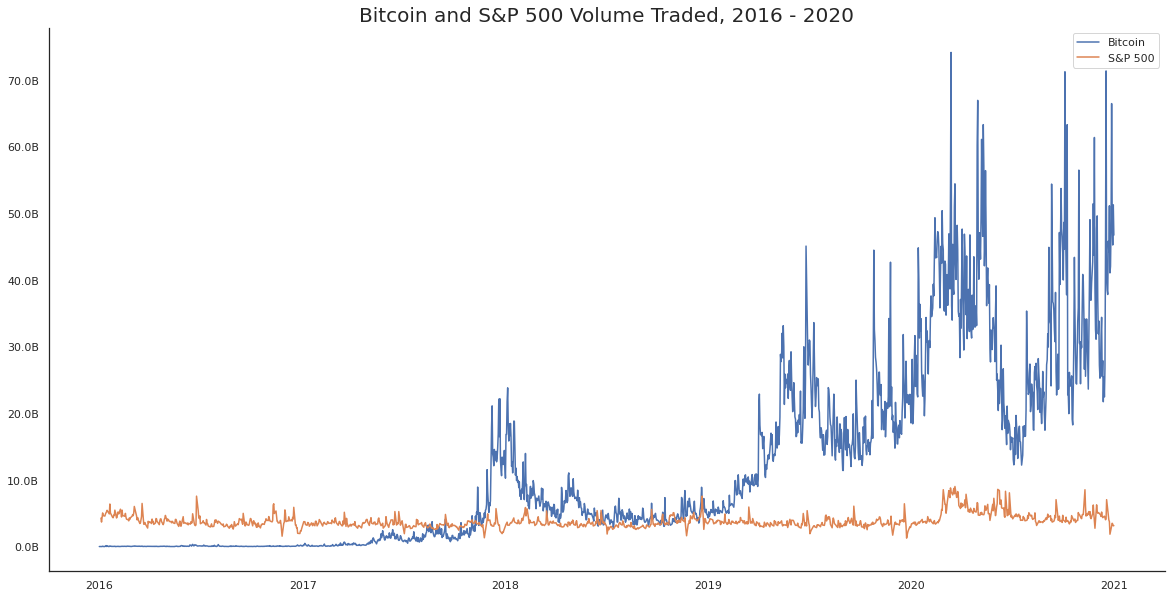

In [ ]:
# Format chart label to show 'B' for 'Billion'
def billions(x, pos):
    'The two args are the value and tick position'
    return '%1.1fB' % (x * 1e-9)

formatter = FuncFormatter(billions)

fig, ax = plt.subplots(figsize = (20, 10))
ax.yaxis.set_major_formatter(formatter)
plt.plot(bitcoin_df['Date'], bitcoin_df['Volume'], label = 'Bitcoin')
plt.plot(sp500_df['Date'], sp500_df['Volume'], label = 'S&P 500')
plt.title('Bitcoin and S&P 500 Volume Traded, 2016 - 2020', size = 20)
plt.legend(loc = 'upper right')
sns.despine()

The volume of Bitcoin traded surpasses S&P 500 in the late 2017. There is also a huge spike in volume traded for Bitcoin in the early and late 2020. 

### Frequency of Daily Returns

Daily returns is calculated by finding the percentage change over the adjusted closing price.

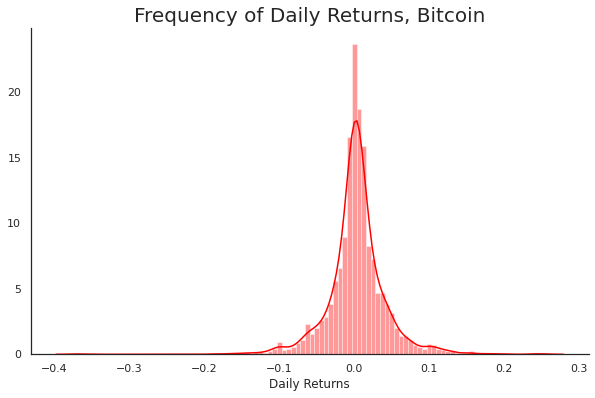

In [ ]:
# Bitcoin
plt.figure(figsize = (10,6))
sns.distplot(bitcoin_df['Return'], bins = 100, color = 'red')
plt.xlabel('Daily Returns')
plt.ylabel('')
plt.title('Frequency of Daily Returns, Bitcoin', size = 20)
sns.despine()

The daily returns for Bitcoin seem to be normally distributed. Som Outlier - reaching -0.4; 0,3. Slightly shifted to the right; more frequent positive return. Get the mean n sd from descriptiv estats

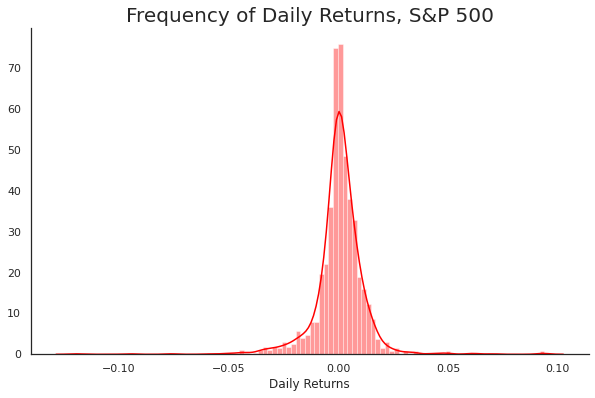

In [ ]:
# S&P 500
plt.figure(figsize = (10,6))
sns.distplot(sp500_df['Return'], bins = 100, color = 'red')
plt.xlabel('Daily Returns')
plt.ylabel('')
plt.title('Frequency of Daily Returns, S&P 500', size = 20)
sns.despine()

Negative daily returns seem to be slightly more frequent than positive returns for S&P 500.

Skewness igher on the right; depends on where the mean is. 

what is the in how many days you geet negtaivve returns above all the toal number of data. Shharee. 

Des stats. 

### Moving Averages

Let's look at the moving averages for closing price and daily returns of Bitcoin and S&P 500 over a 7, 30, and 90-day period.

#### Closing Price

In [ ]:
# Bitcoin - Add a new column for moving averages 
ma_day_close = [7, 30, 90]

for ma_close in ma_day_close:
    column_name = 'MA Close for %s days' %(str(ma_close))
    bitcoin_df[column_name] = bitcoin_df['Close'].rolling(window = ma_close, center = False).mean()

In [ ]:
bitcoin_df.head(20)

,Name,Symbol,Date,High,Low,Open,Close,Return,Volume,Marketcap,MA Close for 7 days,MA Close for 30 days,MA Close for 90 days
0,Bitcoin,BTC,2016-01-01,436.246002,427.515015,430.721008,434.334015,NaN,36278900,6.529300e+09,NaN,NaN,NaN
1,Bitcoin,BTC,2016-01-02,436.062012,431.869995,434.622009,433.437988,-0.0021,30096600,6.517390e+09,NaN,NaN,NaN
2,Bitcoin,BTC,2016-01-03,433.743012,424.705994,433.578003,430.010986,-0.0079,39633800,6.467430e+09,NaN,NaN,NaN
3,Bitcoin,BTC,2016-01-04,434.516998,429.084015,430.061005,433.091003,0.0072,38477500,6.515713e+09,NaN,NaN,NaN
4,Bitcoin,BTC,2016-01-05,434.182007,429.675995,433.069000,431.959992,-0.0026,34522600,6.500393e+09,NaN,NaN,NaN
5,Bitcoin,BTC,2016-01-06,431.855988,426.341003,431.855988,429.105011,-0.0066,34042500,6.458942e+09,NaN,NaN,NaN
6,Bitcoin,BTC,2016-01-07,458.765991,429.076996,430.010986,458.048004,0.0674,87562200,6.896279e+09,435.712429,NaN,NaN
7,Bitcoin,BTC,2016-01-08,462.933991,447.937988,457.537994,453.230011,-0.0105,56993000,6.825700e+09,438.411857,NaN,NaN
8,Bitcoin,BTC,2016-01-09,454.640015,446.889008,453.382996,447.610992,-0.0124,32278000,6.742767e+09,440.436571,NaN,NaN
9,Bitcoin,BTC,2016-01-10,448.308991,440.351013,448.238007,447.990997,0.0008,35995900,6.750440e+09,443.005144,NaN,NaN


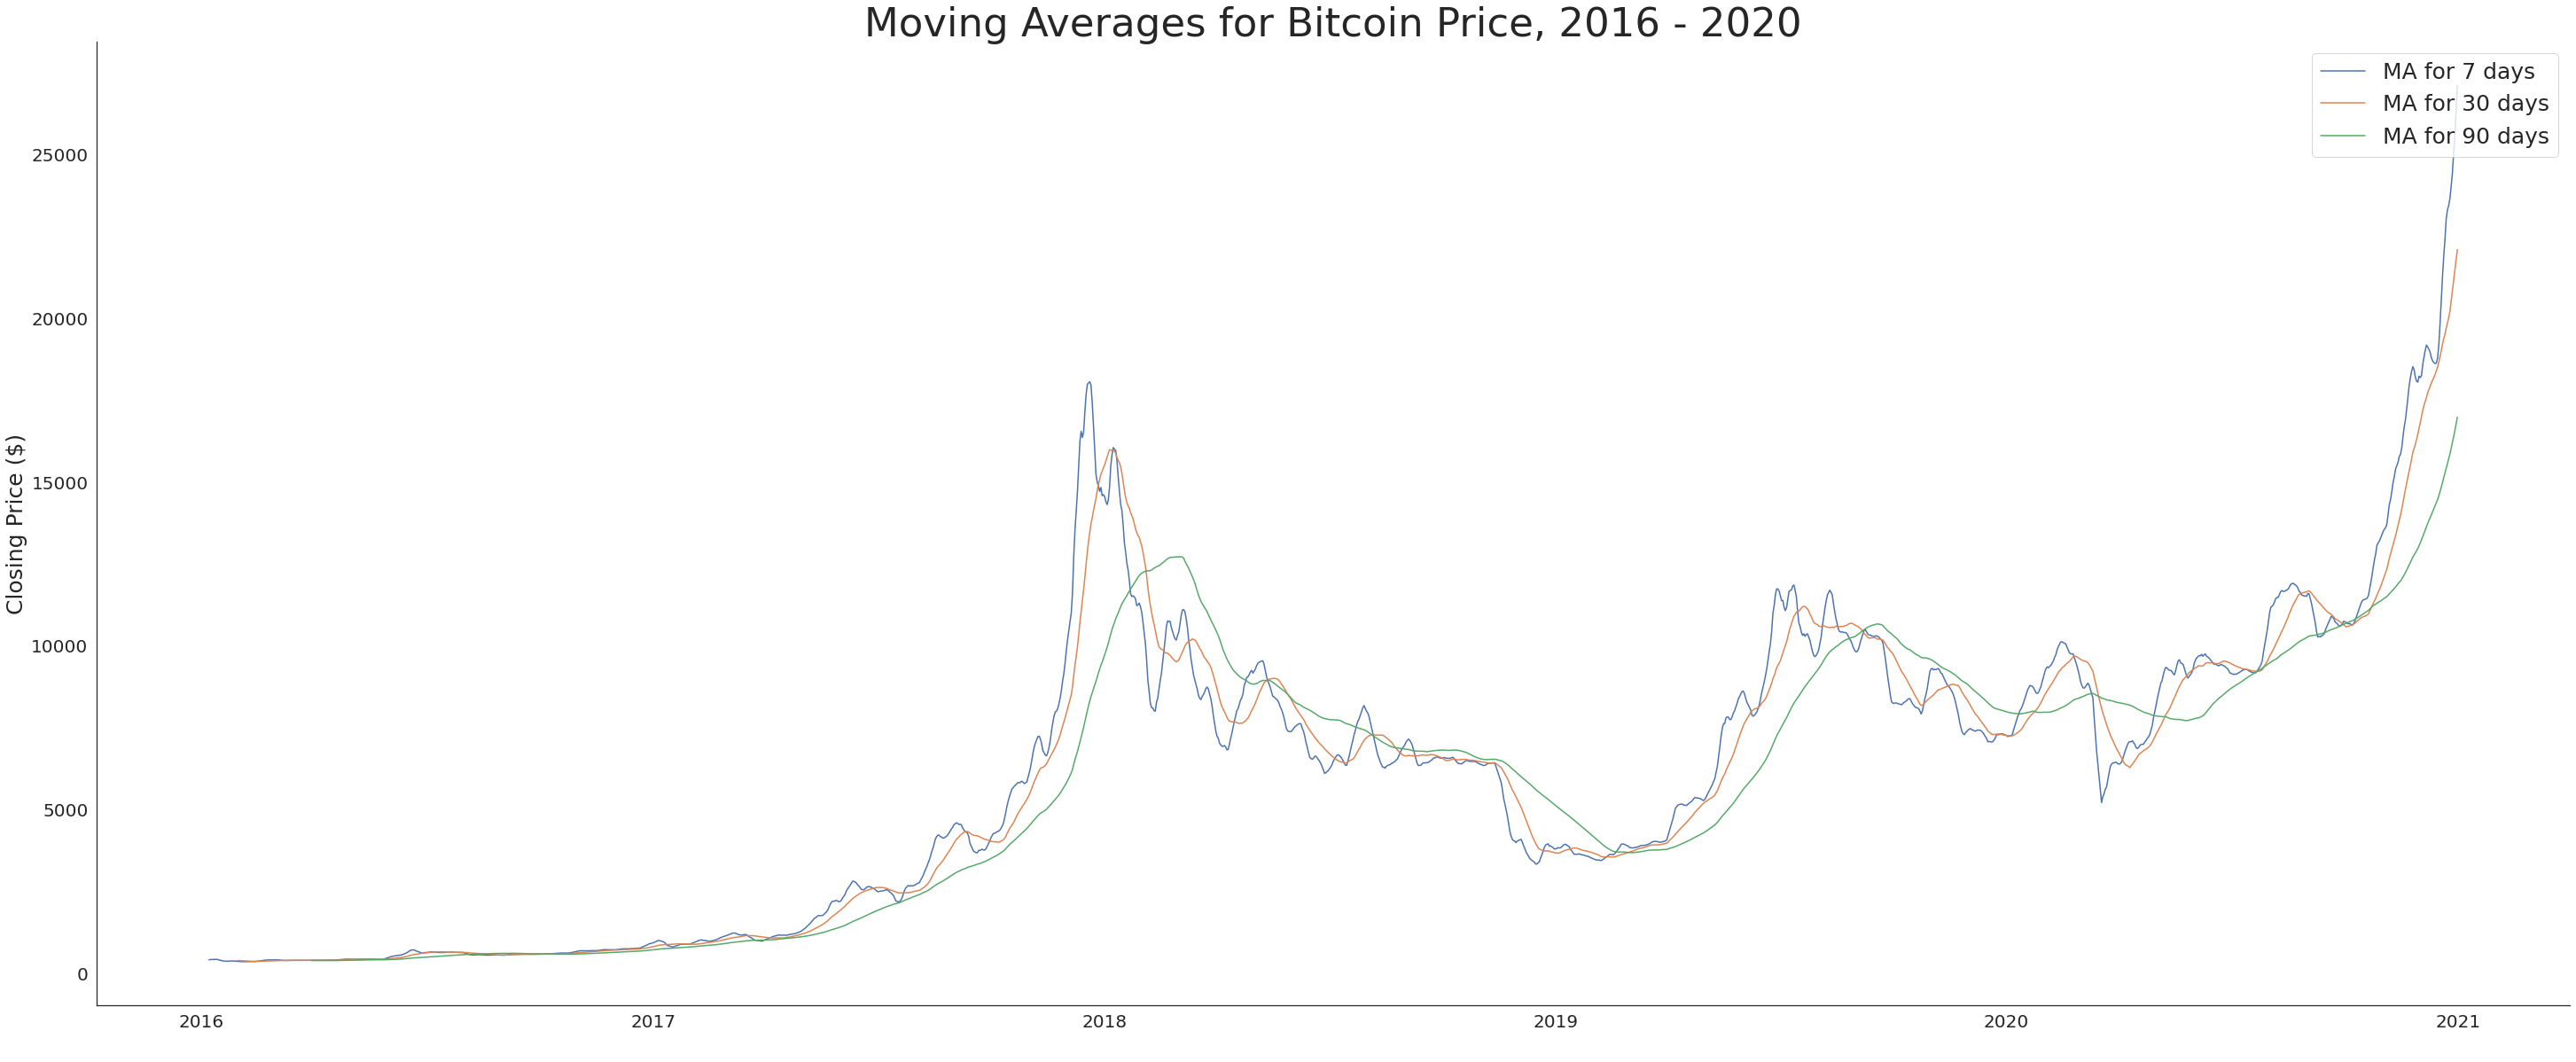

In [ ]:
# Plot the moving averages
plt.figure(figsize = (50, 20))
plt.plot(bitcoin_df['Date'], bitcoin_df['MA Close for 7 days'], label = 'MA for 7 days')
plt.plot(bitcoin_df['Date'], bitcoin_df['MA Close for 30 days'], label = 'MA for 30 days')
plt.plot(bitcoin_df['Date'], bitcoin_df['MA Close for 90 days'], label = 'MA for 90 days')
plt.xlabel(' ', fontsize = 25)
plt.ylabel('Closing Price ($)', fontsize = 25)
plt.title('Moving Averages for Bitcoin Price, 2016 - 2020', size = 45)
plt.legend(loc = 'upper right', fontsize = 25)
plt.yticks(fontsize = 20)
plt.xticks(fontsize = 20)
sns.despine()
plt.show()

Moving averages for more days are smoother as seen in the plot above. Bitcoin price in the late 2020 catches up to  its price in the early 2018 after experiencing a decline and constant fluctuations in price.  

In [ ]:
# S&P 500 - Add a new column for moving averages 
ma_day_close = [7, 30, 90]

for ma_close in ma_day_close:
    column_name = 'MA Close for %s days' %(str(ma_close))
    sp500_df[column_name] = sp500_df['Adj Close'].rolling(window = ma_close, center = False).mean()

In [ ]:
sp500_df.head(20)

,Name,Date,Open,High,Low,Close,Adj Close,Return,Volume,MA Close for 7 days,MA Close for 30 days,MA Close for 90 days
0,S&P 500,2016-01-04,2038.20,2038.20,1989.68,2012.66,2012.66,NaN,4304880000,NaN,NaN,NaN
1,S&P 500,2016-01-05,2013.78,2021.94,2004.17,2016.71,2016.71,0.0020,3706620000,NaN,NaN,NaN
2,S&P 500,2016-01-06,2011.71,2011.71,1979.05,1990.26,1990.26,-0.0131,4336660000,NaN,NaN,NaN
3,S&P 500,2016-01-07,1985.32,1985.32,1938.83,1943.09,1943.09,-0.0237,5076590000,NaN,NaN,NaN
4,S&P 500,2016-01-08,1945.97,1960.40,1918.46,1922.03,1922.03,-0.0108,4664940000,NaN,NaN,NaN
5,S&P 500,2016-01-11,1926.12,1935.65,1901.10,1923.67,1923.67,0.0009,4607290000,NaN,NaN,NaN
6,S&P 500,2016-01-12,1927.83,1947.38,1914.35,1938.68,1938.68,0.0078,4887260000,1963.871429,NaN,NaN
7,S&P 500,2016-01-13,1940.34,1950.33,1886.41,1890.28,1890.28,-0.0250,5087030000,1946.388571,NaN,NaN
8,S&P 500,2016-01-14,1891.68,1934.47,1878.93,1921.84,1921.84,0.0167,5241110000,1932.835714,NaN,NaN
9,S&P 500,2016-01-15,1916.68,1916.68,1857.83,1880.33,1880.33,-0.0216,5468460000,1917.131429,NaN,NaN


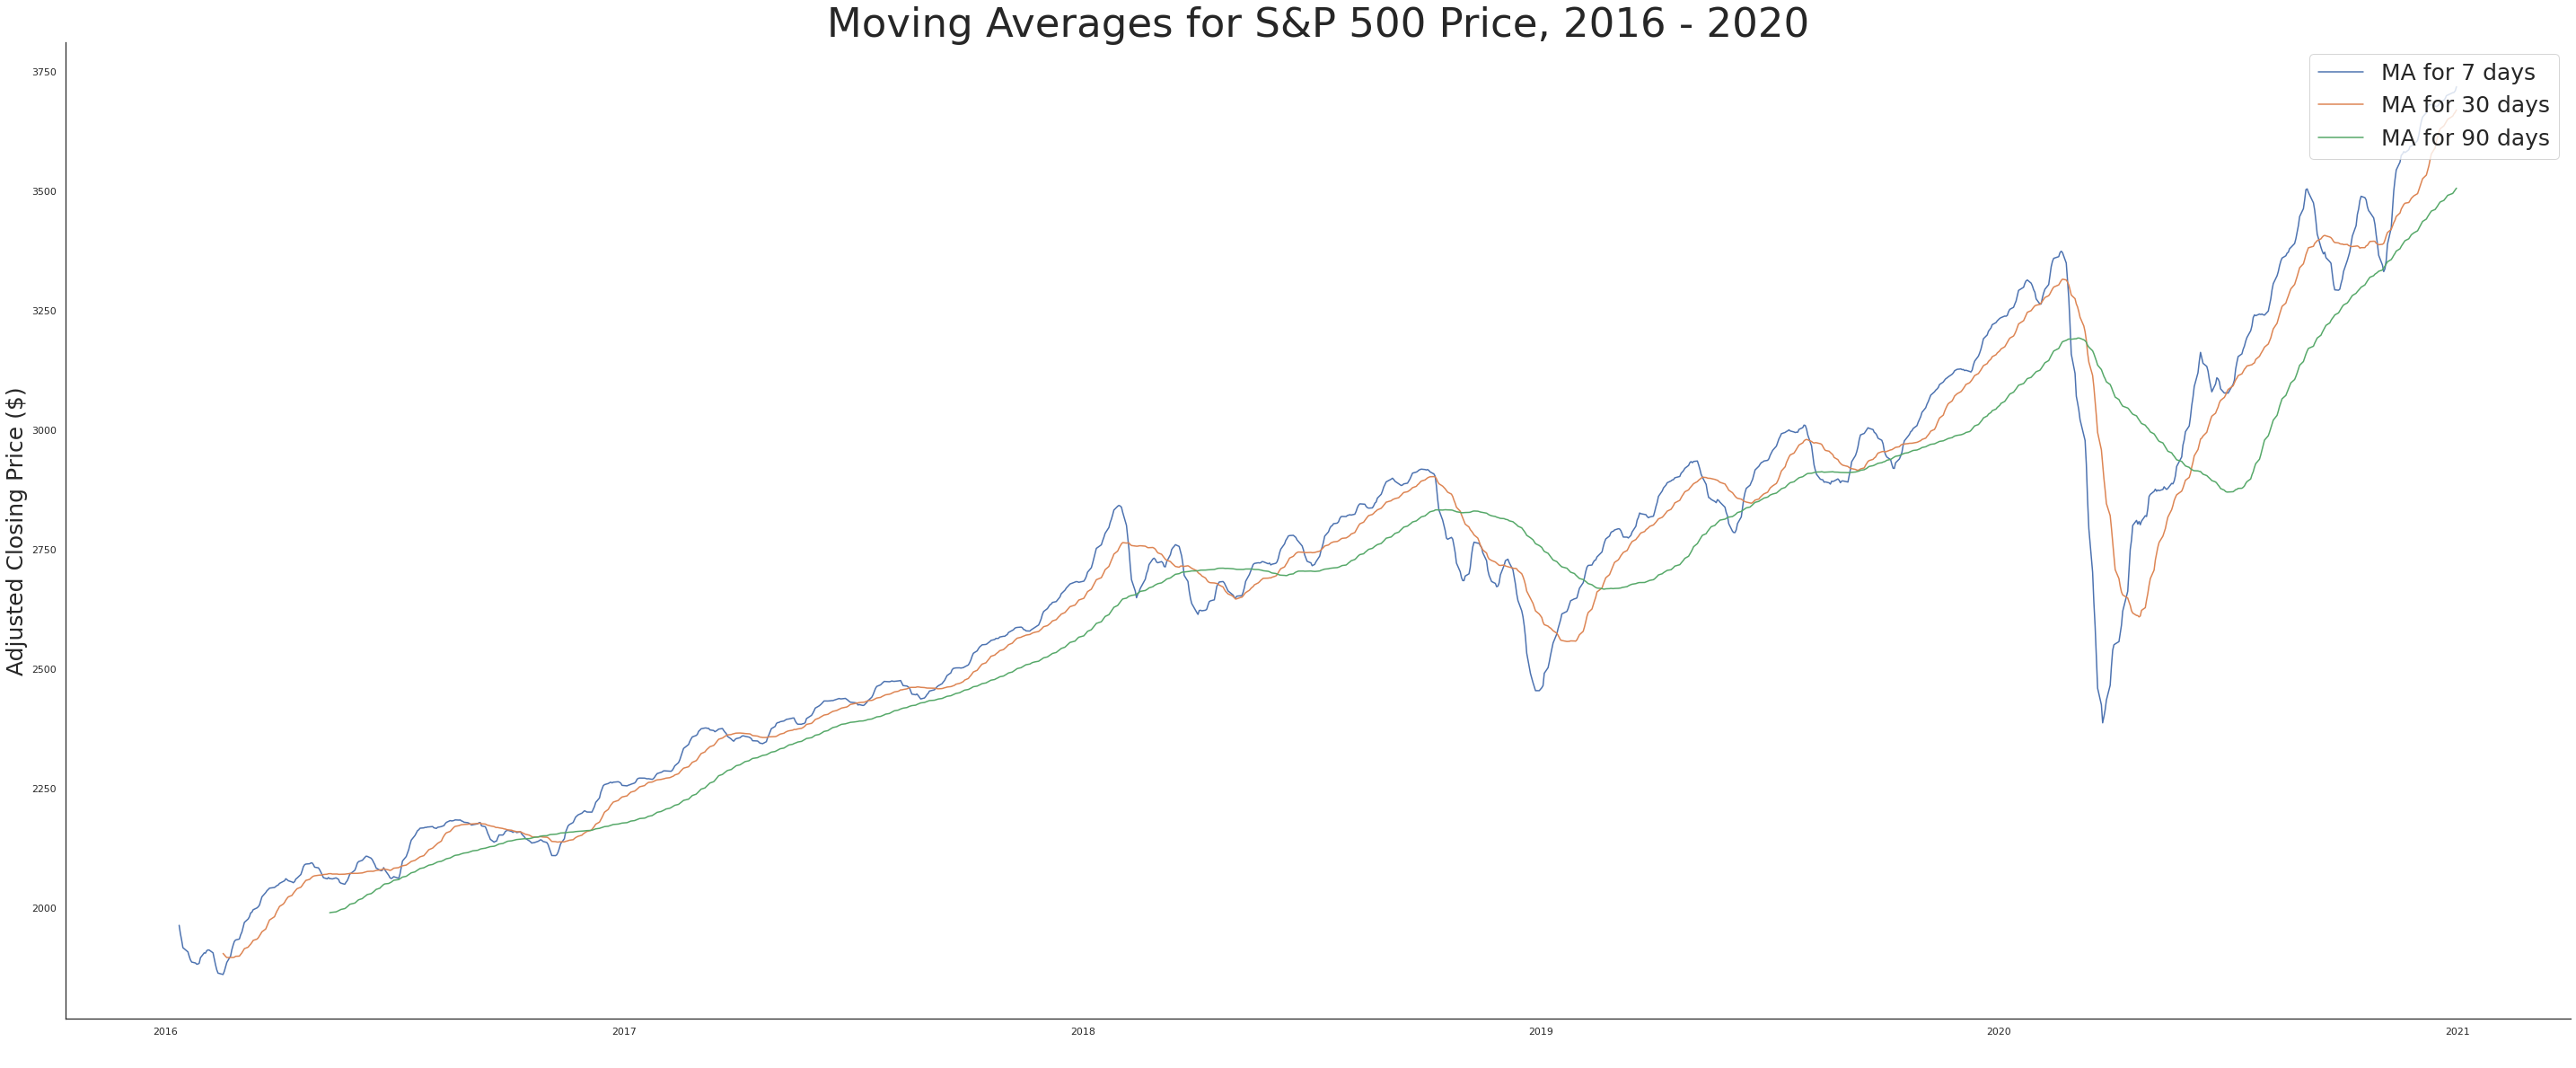

In [ ]:
# Plot the moving averages
plt.figure(figsize = (50, 20))
plt.plot(sp500_df['Date'], sp500_df['MA Close for 7 days'], label = 'MA for 7 days')
plt.plot(sp500_df['Date'], sp500_df['MA Close for 30 days'], label = 'MA for 30 days')
plt.plot(sp500_df['Date'], sp500_df['MA Close for 90 days'], label = 'MA for 90 days')
plt.xlabel(' ', fontsize = 25)
plt.ylabel('Adjusted Closing Price ($)', fontsize = 25)
plt.title('Moving Averages for S&P 500 Price, 2016 - 2020', size = 45)
plt.legend(loc = 'upper right', fontsize = 25)
sns.despine()
plt.show()

S&P 500 has generally been on an upward trend even with a slight dip in 2019. Unlike Bitcoin, S&P 500 experiences a huge dip in price in the early 2020 and starts to trend upward by the end of the month. 

#### Daily Returns

In [ ]:
# Bitcoin - Add a new column for moving averages 
ma_day_return = [7, 30, 90]

for ma_return in ma_day_return:
    column_name = 'MA Return for %s days' %(str(ma_return))
    bitcoin_df[column_name] = bitcoin_df['Return'].rolling(window = ma_return, center = False).mean()

In [ ]:
bitcoin_df.head(20)

,Name,Symbol,Date,High,Low,Open,Close,Return,Volume,Marketcap,MA Close for 7 days,MA Close for 30 days,MA Close for 90 days,MA Return for 7 days,MA Return for 30 days,MA Return for 90 days
0,Bitcoin,BTC,2016-01-01,436.246002,427.515015,430.721008,434.334015,NaN,36278900,6.529300e+09,NaN,NaN,NaN,NaN,NaN,NaN
1,Bitcoin,BTC,2016-01-02,436.062012,431.869995,434.622009,433.437988,-0.0021,30096600,6.517390e+09,NaN,NaN,NaN,NaN,NaN,NaN
2,Bitcoin,BTC,2016-01-03,433.743012,424.705994,433.578003,430.010986,-0.0079,39633800,6.467430e+09,NaN,NaN,NaN,NaN,NaN,NaN
3,Bitcoin,BTC,2016-01-04,434.516998,429.084015,430.061005,433.091003,0.0072,38477500,6.515713e+09,NaN,NaN,NaN,NaN,NaN,NaN
4,Bitcoin,BTC,2016-01-05,434.182007,429.675995,433.069000,431.959992,-0.0026,34522600,6.500393e+09,NaN,NaN,NaN,NaN,NaN,NaN
5,Bitcoin,BTC,2016-01-06,431.855988,426.341003,431.855988,429.105011,-0.0066,34042500,6.458942e+09,NaN,NaN,NaN,NaN,NaN,NaN
6,Bitcoin,BTC,2016-01-07,458.765991,429.076996,430.010986,458.048004,0.0674,87562200,6.896279e+09,435.712429,NaN,NaN,NaN,NaN,NaN
7,Bitcoin,BTC,2016-01-08,462.933991,447.937988,457.537994,453.230011,-0.0105,56993000,6.825700e+09,438.411857,NaN,NaN,0.006414,NaN,NaN
8,Bitcoin,BTC,2016-01-09,454.640015,446.889008,453.382996,447.610992,-0.0124,32278000,6.742767e+09,440.436571,NaN,NaN,0.004943,NaN,NaN
9,Bitcoin,BTC,2016-01-10,448.308991,440.351013,448.238007,447.990997,0.0008,35995900,6.750440e+09,443.005144,NaN,NaN,0.006186,NaN,NaN


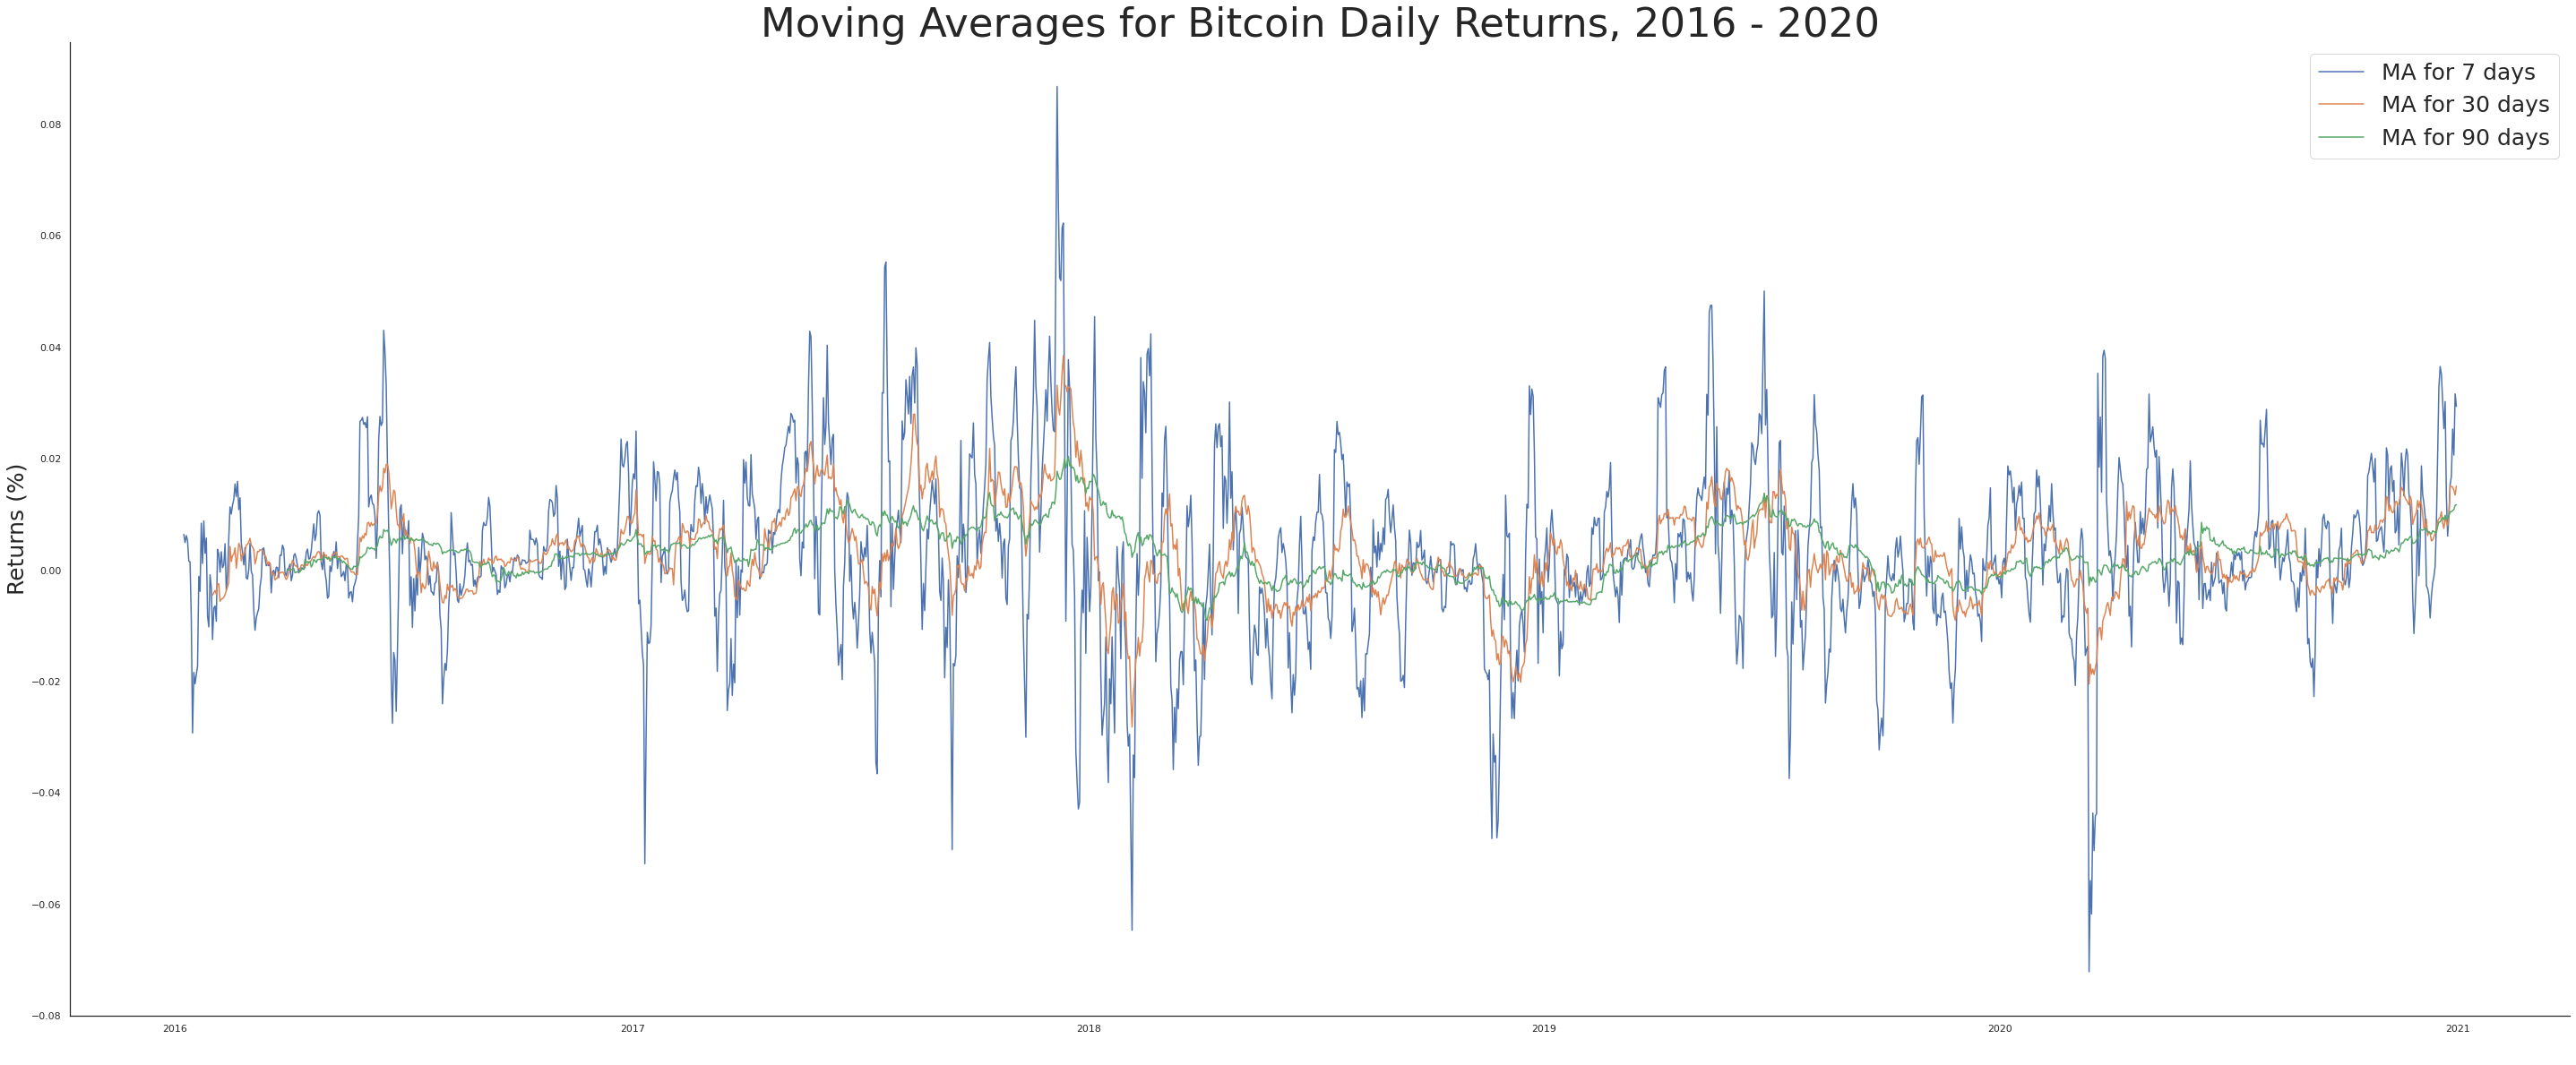

In [ ]:
# Plot the moving averages
plt.figure(figsize = (50, 20))
plt.plot(bitcoin_df['Date'], bitcoin_df['MA Return for 7 days'], label = 'MA for 7 days') 
plt.plot(bitcoin_df['Date'], bitcoin_df['MA Return for 30 days'], label = 'MA for 30 days')
plt.plot(bitcoin_df['Date'], bitcoin_df['MA Return for 90 days'], label = 'MA for 90 days')
plt.xlabel(' ', fontsize = 25)
plt.ylabel('Returns (%)', fontsize = 25)
plt.title('Moving Averages for Bitcoin Daily Returns, 2016 - 2020', size = 45)
plt.legend(loc = 'upper right', fontsize = 25)
sns.despine()
plt.show()

In [ ]:
# S&P 500 - Add a new column for moving averages
ma_day_return = [7,30,90]

for ma_return in ma_day_return:
    column_name = "MA Return for %s days" %(str(ma_return))
    sp500_df[column_name] = sp500_df['Return'].rolling(window=ma_return,center=False).mean()

In [ ]:
sp500_df.head(20)

,Name,Date,Open,High,Low,Close,Adj Close,Return,Volume,MA Close for 7 days,MA Close for 30 days,MA Close for 90 days,MA Return for 7 days,MA Return for 30 days,MA Return for 90 days
0,S&P 500,2016-01-04,2038.20,2038.20,1989.68,2012.66,2012.66,NaN,4304880000,NaN,NaN,NaN,NaN,NaN,NaN
1,S&P 500,2016-01-05,2013.78,2021.94,2004.17,2016.71,2016.71,0.0020,3706620000,NaN,NaN,NaN,NaN,NaN,NaN
2,S&P 500,2016-01-06,2011.71,2011.71,1979.05,1990.26,1990.26,-0.0131,4336660000,NaN,NaN,NaN,NaN,NaN,NaN
3,S&P 500,2016-01-07,1985.32,1985.32,1938.83,1943.09,1943.09,-0.0237,5076590000,NaN,NaN,NaN,NaN,NaN,NaN
4,S&P 500,2016-01-08,1945.97,1960.40,1918.46,1922.03,1922.03,-0.0108,4664940000,NaN,NaN,NaN,NaN,NaN,NaN
5,S&P 500,2016-01-11,1926.12,1935.65,1901.10,1923.67,1923.67,0.0009,4607290000,NaN,NaN,NaN,NaN,NaN,NaN
6,S&P 500,2016-01-12,1927.83,1947.38,1914.35,1938.68,1938.68,0.0078,4887260000,1963.871429,NaN,NaN,NaN,NaN,NaN
7,S&P 500,2016-01-13,1940.34,1950.33,1886.41,1890.28,1890.28,-0.0250,5087030000,1946.388571,NaN,NaN,-0.008843,NaN,NaN
8,S&P 500,2016-01-14,1891.68,1934.47,1878.93,1921.84,1921.84,0.0167,5241110000,1932.835714,NaN,NaN,-0.006743,NaN,NaN
9,S&P 500,2016-01-15,1916.68,1916.68,1857.83,1880.33,1880.33,-0.0216,5468460000,1917.131429,NaN,NaN,-0.007957,NaN,NaN


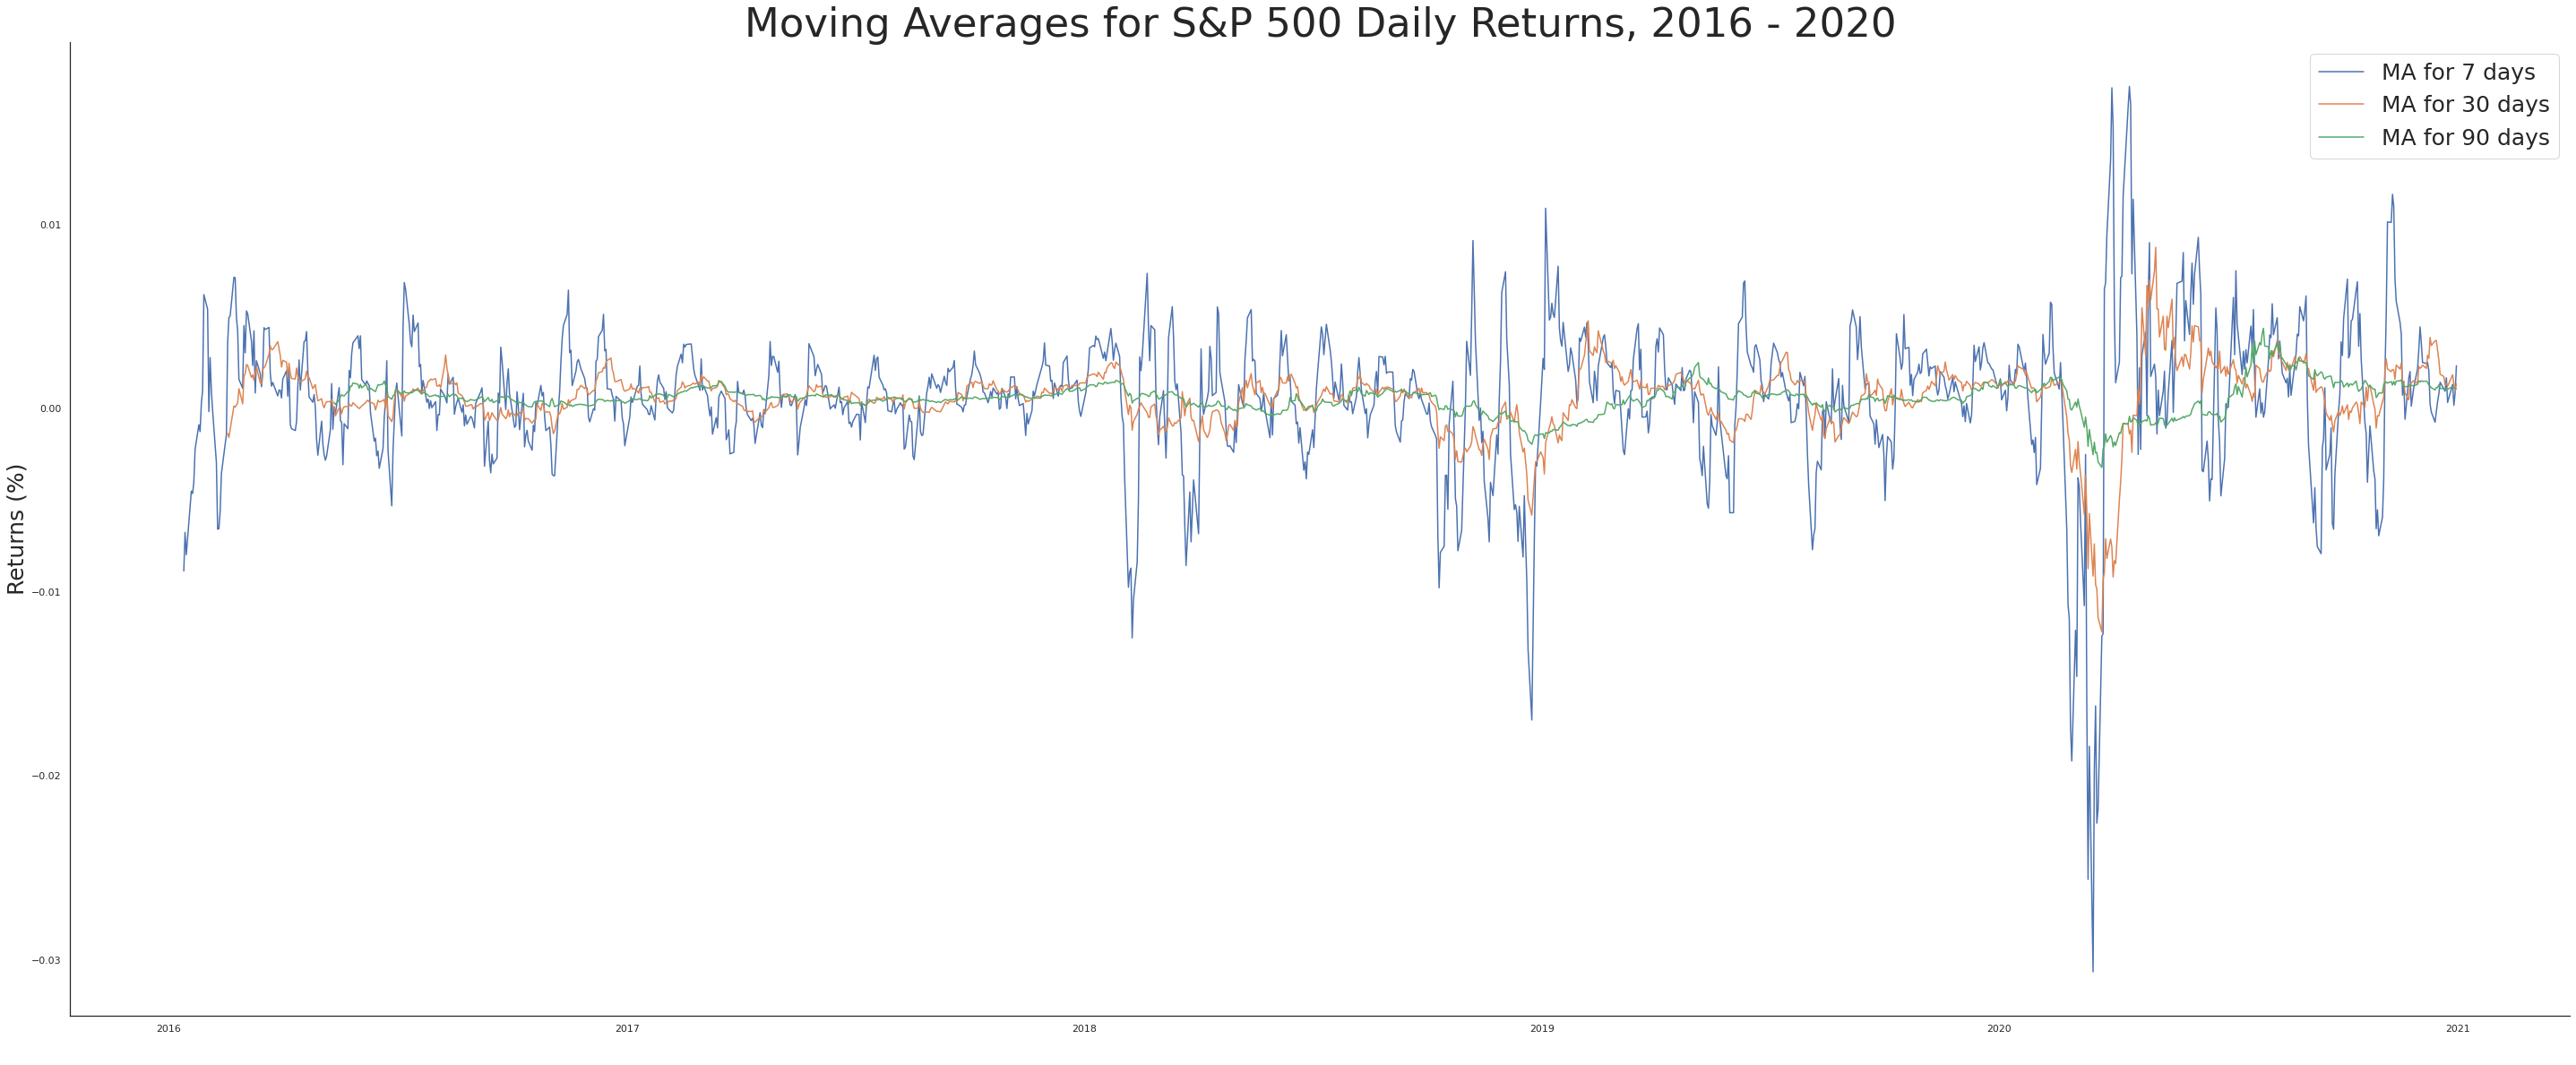

In [ ]:
# Plot the moving averages
plt.figure(figsize = (50, 20))
plt.plot(sp500_df['Date'], sp500_df['MA Return for 7 days'], label = 'MA for 7 days') 
plt.plot(sp500_df['Date'], sp500_df['MA Return for 30 days'], label = 'MA for 30 days')
plt.plot(sp500_df['Date'], sp500_df['MA Return for 90 days'], label = 'MA for 90 days')
plt.xlabel(' ', fontsize=25)
plt.ylabel('Returns (%)', fontsize = 25)
plt.title('Moving Averages for S&P 500 Daily Returns, 2016 - 2020', size = 45)
plt.legend(loc = 'upper right', fontsize = 25)
sns.despine()
plt.show()

Comparing to Bitcoin, S&P 500 returns seem to be less volatile throughout the years. 

## Consumer Confidence Index

### Descriptive Statistics

In [ ]:
cci_df.describe()

,Actual,Change
count,61.000000,60.000000
mean,115.757377,0.000878
std,15.836513,0.066962
min,84.800000,-0.275833
25%,98.600000,-0.029467
50%,121.100000,-0.003315
75%,128.000000,0.038208
max,138.400000,0.200472


### The Change in Consumer Confidence Index

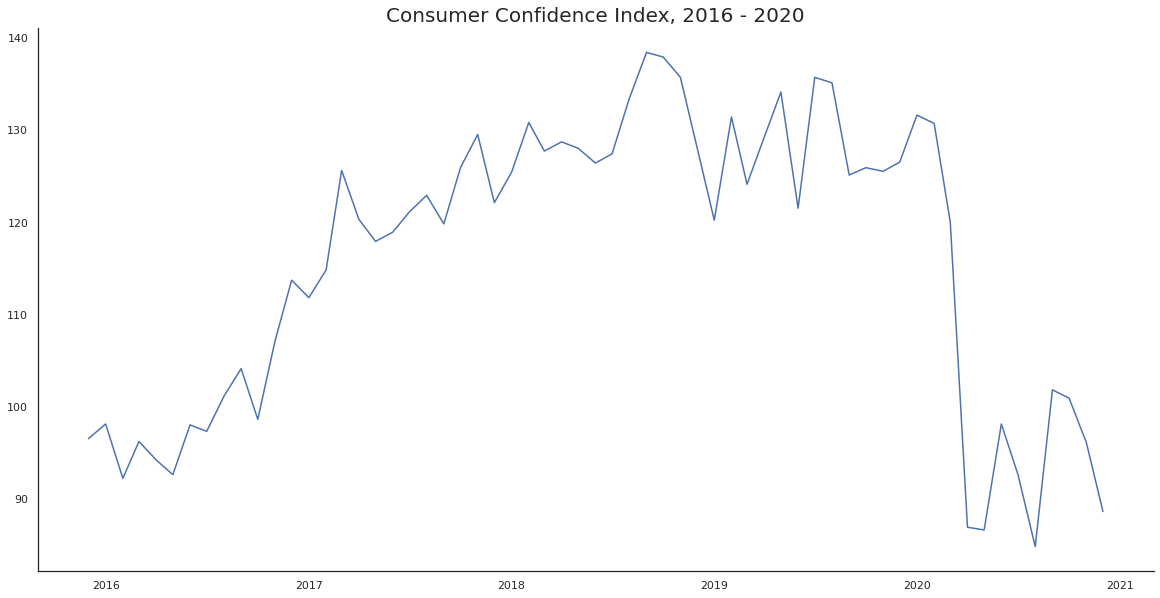

In [ ]:
plt.figure(figsize = (20, 10))
plt.plot(cci_df['Month_Year'], cci_df['Actual'])
plt.title('Consumer Confidence Index, 2016 - 2020', size = 20)
sns.despine()

The Consumer Confidence Index seems to follow a similar pattern with the S&P 500 price, where there is an upward trend from 2016 - 2019, with a slight dip in 2019, and a huge dip in 2020. Consumers are less pessimistic in 2020 than they are in 2016.  

# Pearson Correlation Analysis

## Bitcoin vs the US Stock Market 

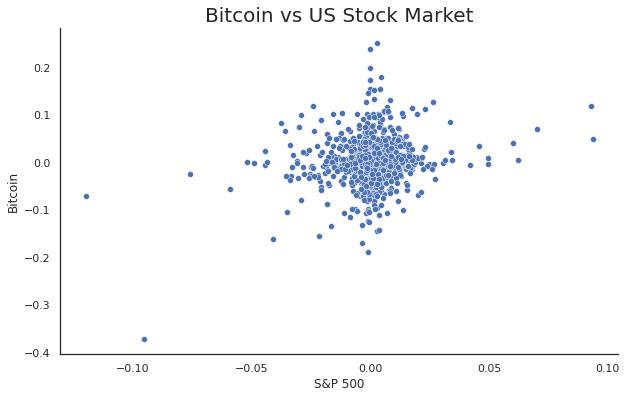

In [ ]:
# Scatterplot to visualize the correlation/relationship between the daily returns of Bitcoin and S&P 500 
sns.set_style('white') 
plt.figure(figsize = (10, 6))
sns.scatterplot(x = 'Return_x', y = 'Return_y', data = df_btc_sp500)
plt.xlabel('S&P 500')
plt.ylabel('Bitcoin')
plt.title('Bitcoin vs US Stock Market', size = 20)
sns.despine()

In [ ]:
# Correlation coefficient between the daily returns of Bitcoin and S&P 500 and its p-value
stats.pearsonr(df_btc_sp500['Return_x'], df_btc_sp500['Return_y'])

(0.16403924381106985, 4.854249855937155e-09)

Looking at the figure above, there seems to be a very minor correlation between Bitcoin and S&P 500 with Pearson R Correlation Coefficient value of 0.16. Let's look at the correlation for each of the 5 years. 

In [ ]:
# 2016
df_2016_bs = df_btc_sp500.loc[(df_btc_sp500['Date'] >= '2016-01-01') & (df_btc_sp500['Date'] < '2017-01-01')]
stats.pearsonr(df_2016_bs['Return_x'], df_2016_bs['Return_y'])

(-0.05231677897446452, 0.40921164778932256)

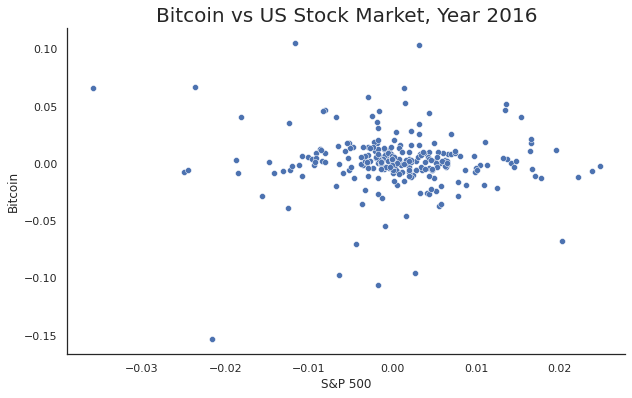

In [ ]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x = 'Return_x', y = 'Return_y', data = df_2016_bs)
plt.xlabel('S&P 500')
plt.ylabel('Bitcoin')
plt.title('Bitcoin vs US Stock Market, Year 2016', size = 20)
sns.despine()

In [ ]:
# 2017
df_2017_bs = df_btc_sp500.loc[(df_btc_sp500['Date'] >= '2017-01-01') & (df_btc_sp500['Date'] < '2018-01-01')]
stats.pearsonr(df_2017_bs['Return_x'], df_2017_bs['Return_y'])

(0.02270296258967524, 0.7203931942240407)

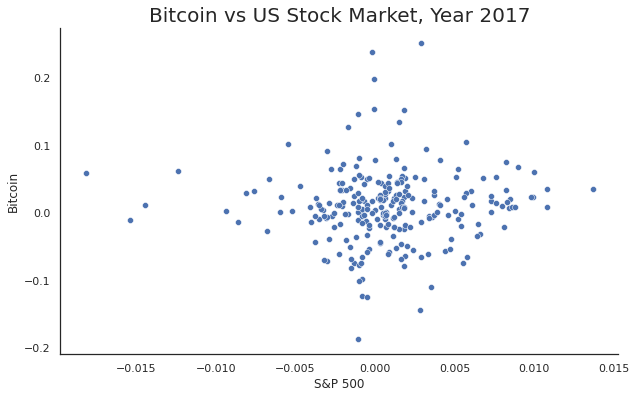

In [ ]:
plt.figure(figsize = (10, 6))
sns.scatterplot(x = 'Return_x', y = 'Return_y', data = df_2017_bs)
plt.xlabel('S&P 500')
plt.ylabel('Bitcoin')
plt.title('Bitcoin vs US Stock Market, Year 2017', size = 20)
sns.despine()

In [ ]:
# 2018
df_2018_bs = df_btc_sp500.loc[(df_btc_sp500['Date'] >= '2018-01-01') & (df_btc_sp500['Date'] < '2019-01-01')]
stats.pearsonr(df_2018_bs['Return_x'], df_2018_bs['Return_y'])

(0.11512905206436533, 0.06861563561515628)

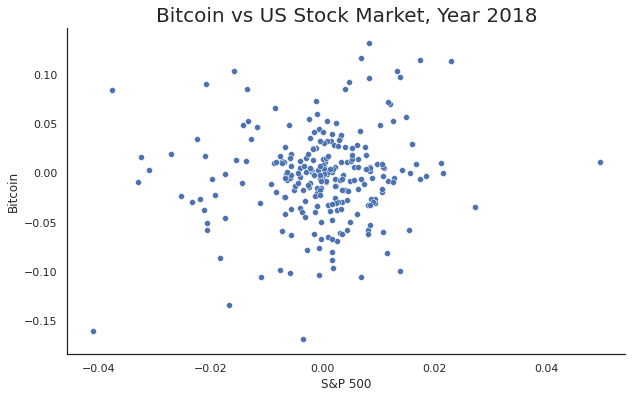

In [ ]:
plt.figure(figsize = (10, 6))
sns.scatterplot(x = 'Return_x', y = 'Return_y', data = df_2018_bs)
plt.xlabel('S&P 500')
plt.ylabel('Bitcoin')
plt.title('Bitcoin vs US Stock Market, Year 2018', size = 20)
sns.despine()

In [ ]:
# 2019
df_2019_bs = df_btc_sp500.loc[(df_btc_sp500['Date'] >= '2019-01-01') & (df_btc_sp500['Date'] < '2020-01-01')]
stats.pearsonr(df_2019_bs['Return_x'], df_2019_bs['Return_y'])

(-0.05869949143246843, 0.35341107075418593)

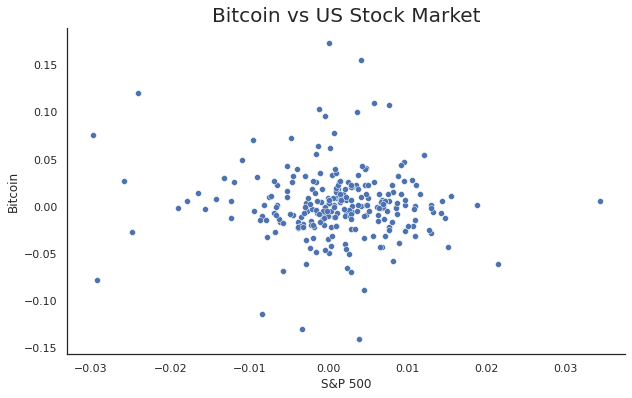

In [ ]:
plt.figure(figsize = (10, 6))
sns.scatterplot(x = 'Return_x', y = 'Return_y', data = df_2019_bs)
plt.xlabel('S&P 500')
plt.ylabel('Bitcoin')
plt.title('Bitcoin vs US Stock Market', size = 20)
sns.despine()

In [ ]:
# 2020
df_2020_bs = df_btc_sp500.loc[(df_btc_sp500['Date'] >= '2020-01-01') & (df_btc_sp500['Date'] < '2021-01-01')]
stats.pearsonr(df_2020_bs['Return_x'], df_2020_bs['Return_y'])

(0.4181056509026918, 3.98100963984957e-12)

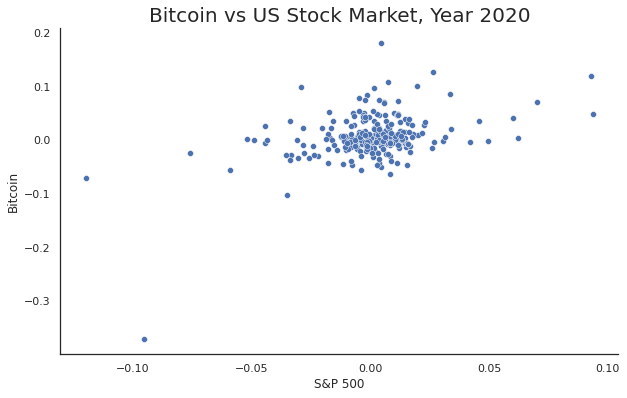

In [ ]:
plt.figure(figsize = (10, 6))
sns.scatterplot(x = 'Return_x', y = 'Return_y', data = df_2020_bs)
plt.xlabel('S&P 500')
plt.ylabel('Bitcoin')
plt.title('Bitcoin vs US Stock Market, Year 2020', size = 20)
sns.despine()

### Summary

In [ ]:
Corr_Table_bs = pd.DataFrame({'Year': ['Overall', '2016', '2017', '2018', '2019', '2020'], 'Correlation': [0.1640, -0.0523, 0.0227, 0.1151, -0.0587, 0.4181], 
                             'Significance': [0, 0.4092, 0.7204, 0.0686, 0.3534, 0]})
Corr_Table_bs = Corr_Table_bs.set_index('Year')
Corr_Table_bs


,Correlation,Significance
Year,,
Overall,0.1640,0.0000
2016,-0.0523,0.4092
2017,0.0227,0.7204
2018,0.1151,0.0686
2019,-0.0587,0.3534
2020,0.4181,0.0000


Bitcoin has maintained a very low correlation to the US stock market throughout the years, but in 2020, we see a rise in correlation of 0.42. This can be due to the increase in adoption of Bitcoin such as more OTC-traded Bitcoin funds, payment networks that enable buying and selling Bitcoin, which resulted in explosive records of volume traded.

Read more: 
https://www.nasdaq.com/articles/bitcoins-correlation-to-markets-hits-a-record-in-2020-2021-02-13#:~:text=Throughout%20most%20of%20its%20history,attractive%20tool%20for%20portfolio%20diversification.


## Bitcoin vs Consumer Confidence Index

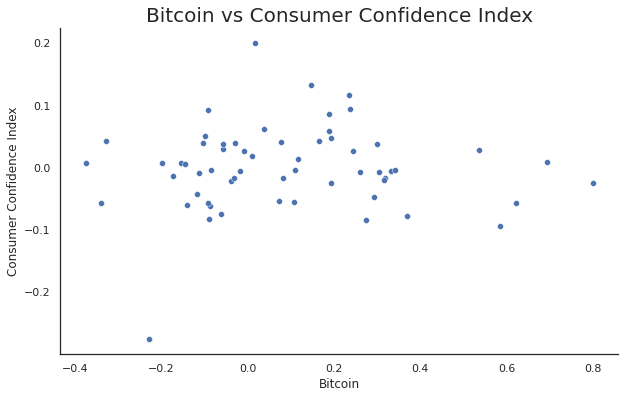

In [ ]:
# Scatterplot to visualize the correlation/relationship 
plt.figure(figsize = (10, 6))
sns.scatterplot(x = 'Return_First_Month', y = 'Change', data = df_btc_cci)
plt.xlabel('Bitcoin')
plt.ylabel('Consumer Confidence Index')
plt.title('Bitcoin vs Consumer Confidence Index', size = 20)
sns.despine()

In [ ]:
# Correlation coefficient between the monthly changes in Bitcoin closing price and Consumer Confidence Index and its p-value
stats.pearsonr(df_btc_cci['Return_First_Month'], df_btc_cci['Change'])

(0.02776235508815497, 0.8346635256024787)

Looking at the figure above, there seems to be no evidence of correlation between Bitcoin and CCI. Let's look at the correlation for each of the 5 years. 

In [ ]:
# 2016
df_2016_bcci = df_btc_cci.loc[(df_btc_cci['Date'] >= '2016-01-01') & (df_btc_cci['Date'] < '2017-01-01')]
stats.pearsonr(df_2016_bcci['Return_First_Month'], df_2016_bcci['Change'])

(0.36703747820693094, 0.2668414914334246)

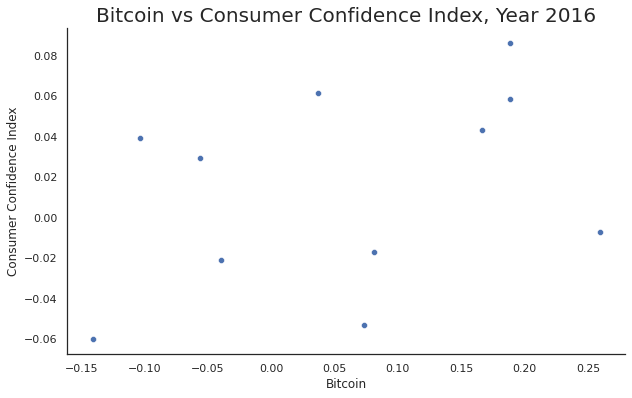

In [ ]:
plt.figure(figsize = (10, 6))
sns.scatterplot(x = 'Return_First_Month', y = 'Change', data = df_2016_bcci)
plt.xlabel('Bitcoin')
plt.ylabel('Consumer Confidence Index')
plt.title('Bitcoin vs Consumer Confidence Index, Year 2016', size = 20)
sns.despine()

In [ ]:
# 2017
df_2017_bcci = df_btc_cci.loc[(df_btc_cci['Date'] >= '2017-01-01') & (df_btc_cci['Date'] < '2018-01-01')]
stats.pearsonr(df_2017_bcci['Return_First_Month'], df_2017_bcci['Change'])

(-0.30967741883823535, 0.32731638183094247)

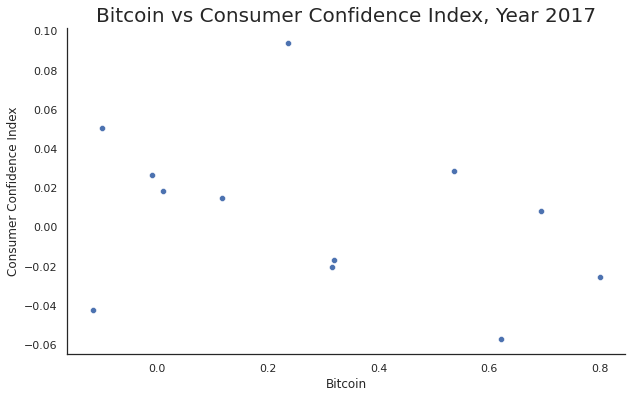

In [ ]:
plt.figure(figsize = (10, 6))
sns.scatterplot(x = 'Return_First_Month', y = 'Change', data = df_2017_bcci)
plt.xlabel('Bitcoin')
plt.ylabel('Consumer Confidence Index')
plt.title('Bitcoin vs Consumer Confidence Index, Year 2017', size = 20)
sns.despine()

In [ ]:
# 2018
df_2018_bcci = df_btc_cci.loc[(df_btc_cci['Date'] >= '2018-01-01') & (df_btc_cci['Date'] < '2019-01-01')]
stats.pearsonr(df_2018_bcci['Return_First_Month'], df_2018_bcci['Change'])

(0.16524146476281454, 0.6077965675966718)

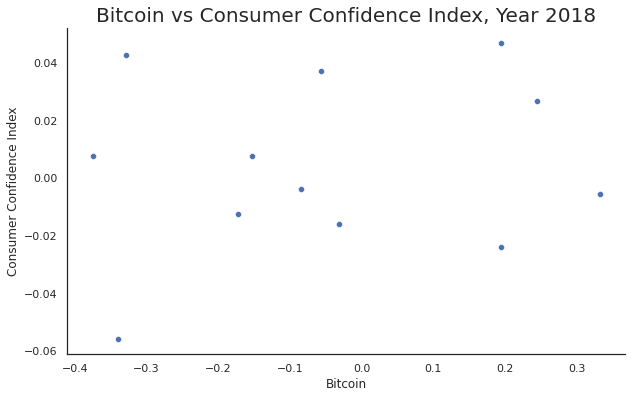

In [ ]:
plt.figure(figsize = (10, 6))
sns.scatterplot(x = 'Return_First_Month', y = 'Change', data = df_2018_bcci)
plt.xlabel('Bitcoin')
plt.ylabel('Consumer Confidence Index')
plt.title('Bitcoin vs Consumer Confidence Index, Year 2018', size = 20)
sns.despine()

In [ ]:
# 2019
df_2019_bcci = df_btc_cci.loc[(df_btc_cci['Date'] >= '2019-01-01') & (df_btc_cci['Date'] < '2020-01-01')]
stats.pearsonr(df_2019_bcci['Return_First_Month'], df_2019_bcci['Change'])

(-0.13134693170807496, 0.6840842194262335)

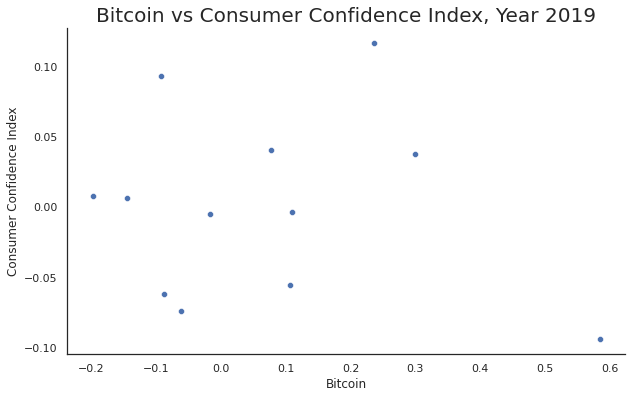

In [ ]:
plt.figure(figsize = (10, 6))
sns.scatterplot(x = 'Return_First_Month', y = 'Change', data = df_2019_bcci)
plt.xlabel('Bitcoin')
plt.ylabel('Consumer Confidence Index')
plt.title('Bitcoin vs Consumer Confidence Index, Year 2019', size = 20)
sns.despine()

In [ ]:
# 2020
df_2020_bcci = df_btc_cci.loc[(df_btc_cci['Date'] >= '2020-01-01') & (df_btc_cci['Date'] < '2021-01-01')]
stats.pearsonr(df_2020_bcci['Return_First_Month'], df_2020_bcci['Change'])

(0.20287910536425935, 0.5271319764093433)

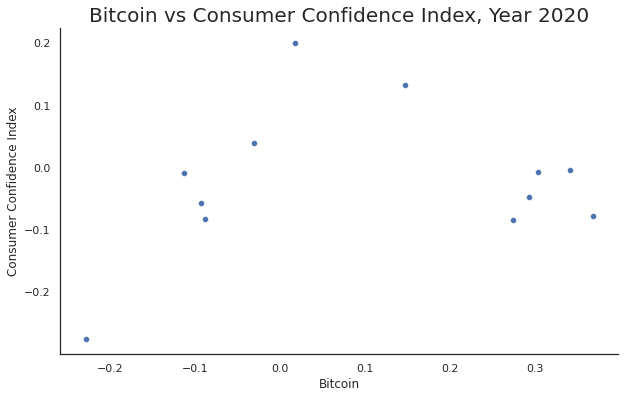

In [ ]:
plt.figure(figsize = (10, 6))
sns.scatterplot(x = 'Return_First_Month', y = 'Change', data = df_2020_bcci)
plt.xlabel('Bitcoin')
plt.ylabel('Consumer Confidence Index')
plt.title('Bitcoin vs Consumer Confidence Index, Year 2020', size = 20)
sns.despine()

### Summary

In [ ]:
Corr_Table_bc = pd.DataFrame({'Year': ['Overall', '2016', '2017', '2018', '2019', '2020'], 'Correlation': [0.0278, 0.3670, -0.3097, 0.1652, -0.1313, 0.2029], 
                             'Significance': [0.8345, 0.2668, 0.3273, 0.6078, 0.6841, 0.5271]})
Corr_Table_bc = Corr_Table_bc.set_index('Year')
Corr_Table_bc

,Correlation,Significance
Year,,
Overall,0.0278,0.8345
2016,0.3670,0.2668
2017,-0.3097,0.3273
2018,0.1652,0.6078
2019,-0.1313,0.6841
2020,0.2029,0.5271


We found no evidence of correlation between Bitcoin and CCI. 

## S&P 500 vs Consumer Confidence Index

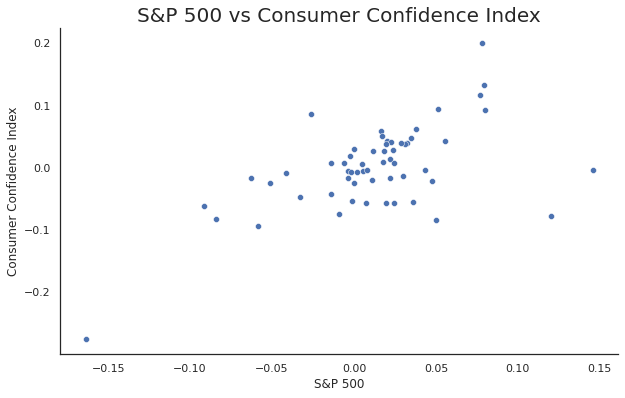

In [ ]:
# Scatterplot to visualize the correlation/relationship 
plt.figure(figsize = (10, 6))
sns.scatterplot(x = 'Return_First_Month', y = 'Change', data = df_sp500_cci)
plt.xlabel('S&P 500')
plt.ylabel('Consumer Confidence Index')
plt.title('S&P 500 vs Consumer Confidence Index', size = 20)
sns.despine()

In [ ]:
# Correlation coefficient between the monthly changes in S&P 500 closing price and Consumer Confidence Index and its p-value
stats.pearsonr(df_sp500_cci['Return_First_Month'], df_sp500_cci['Change'])

(0.5778616854990928, 2.0364965370860576e-06)

Looking at the figure above, there seems to be a slightly high correlation between S&P 500 and CCI with Pearson R Correlation Coefficient value of 0.58. Let's look at the correlation for each of the 5 years. 

In [ ]:
# 2016
df_2016_scci = df_sp500_cci.loc[(df_sp500_cci['Date'] >= '2016-01-01') & (df_sp500_cci['Date'] < '2017-01-01')]
stats.pearsonr(df_2016_scci['Return_First_Month'], df_2016_scci['Change'])

(-0.05318349330825999, 0.8839896130040487)

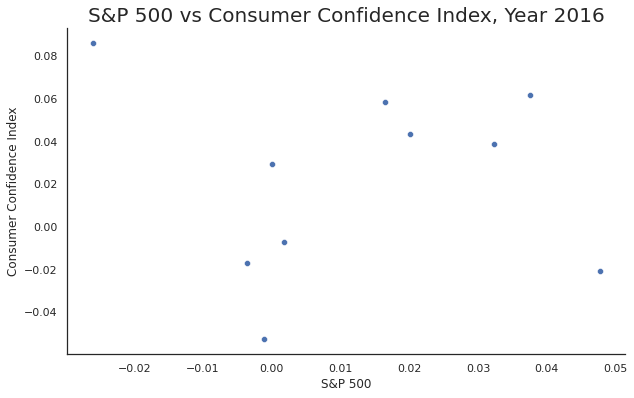

In [ ]:
plt.figure(figsize = (10, 6))
sns.scatterplot(x = 'Return_First_Month', y = 'Change', data = df_2016_scci)
plt.xlabel('S&P 500')
plt.ylabel('Consumer Confidence Index')
plt.title('S&P 500 vs Consumer Confidence Index, Year 2016', size = 20)
sns.despine()

In [ ]:
# 2017
df_2017_scci = df_sp500_cci[(df_btc_cci['Date'] >= '2017-01-01') & (df_sp500_cci['Date'] < '2018-01-01')]
stats.pearsonr(df_2017_scci['Return_First_Month'], df_2017_scci['Change'])

(0.6409778189148356, 0.03357101038314815)

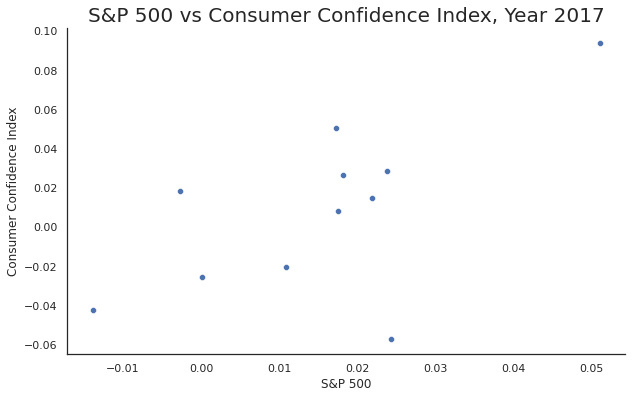

In [ ]:
plt.figure(figsize = (10, 6))
sns.scatterplot(x = 'Return_First_Month', y = 'Change', data = df_2017_scci)
plt.xlabel('S&P 500')
plt.ylabel('Consumer Confidence Index')
plt.title('S&P 500 vs Consumer Confidence Index, Year 2017', size = 20)
sns.despine()

In [ ]:
# 2018
df_2018_scci = df_sp500_cci.loc[(df_sp500_cci['Date'] >= '2018-01-01') & (df_sp500_cci['Date'] < '2019-01-01')]
stats.pearsonr(df_2018_scci['Return_First_Month'], df_2018_scci['Change'])

(0.564498695128592, 0.05586170457666543)

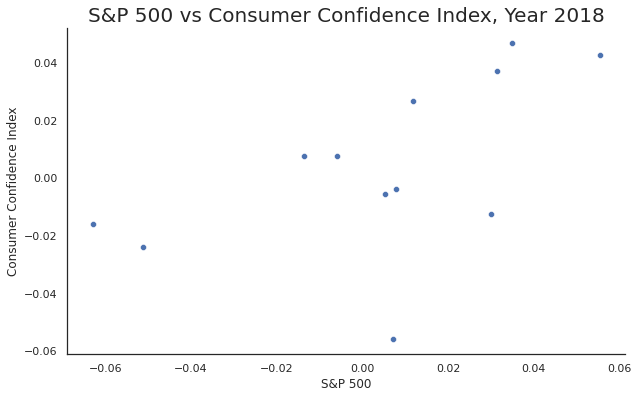

In [ ]:
plt.figure(figsize = (10, 6))
sns.scatterplot(x = 'Return_First_Month', y = 'Change', data = df_2018_scci)
plt.xlabel('S&P 500')
plt.ylabel('Consumer Confidence Index')
plt.title('S&P 500 vs Consumer Confidence Index, Year 2018', size = 20)
sns.despine()

In [ ]:
# 2019
df_2019_scci = df_sp500_cci.loc[(df_sp500_cci['Date'] >= '2019-01-01') & (df_sp500_cci['Date'] < '2020-01-01')]
stats.pearsonr(df_2019_scci['Return_First_Month'], df_2019_scci['Change'])

(0.7836031765541189, 0.002565046375148158)

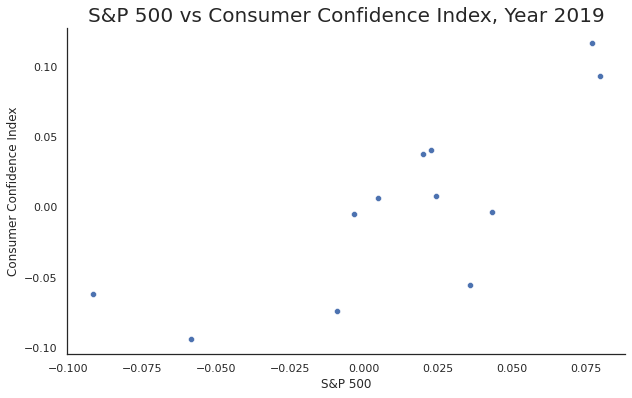

In [ ]:
plt.figure(figsize = (10, 6))
sns.scatterplot(x = 'Return_First_Month', y = 'Change', data = df_2019_scci)
plt.xlabel('S&P 500')
plt.ylabel('Consumer Confidence Index')
plt.title('S&P 500 vs Consumer Confidence Index, Year 2019', size = 20)
sns.despine()

In [ ]:
# 2020
df_2020_scci = df_sp500_cci.loc[(df_sp500_cci['Date'] >= '2020-01-01') & (df_sp500_cci['Date'] < '2021-01-01')]
stats.pearsonr(df_2020_scci['Return_First_Month'], df_2020_scci['Change'])

(0.6147689742155582, 0.03339620786488163)

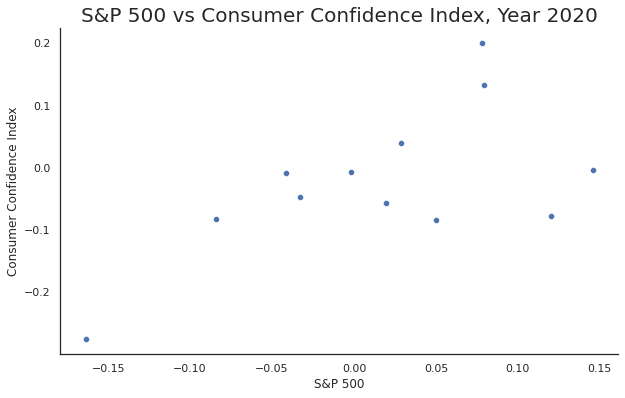

In [ ]:
plt.figure(figsize = (10, 6))
sns.scatterplot(x = 'Return_First_Month', y = 'Change', data = df_2020_scci)
plt.xlabel('S&P 500')
plt.ylabel('Consumer Confidence Index')
plt.title('S&P 500 vs Consumer Confidence Index, Year 2020', size = 20)
sns.despine()

### Summary

In [ ]:
Corr_Table_sc = pd.DataFrame({'Year': ['Overall', '2016', '2017', '2018', '2019', '2020'], 'Correlation': [0.5779, -0.0532, 0.6410, 0.5645, 0.7836, 0.6148], 
                             'Significance': [0, 0.8840, 0.0336, 0.0559, 0.0026, 0.0334]})
Corr_Table_sc = Corr_Table_sc.set_index('Year')
Corr_Table_sc


,Correlation,Significance
Year,,
Overall,0.5779,0.0000
2016,-0.0532,0.8840
2017,0.6410,0.0336
2018,0.5645,0.0559
2019,0.7836,0.0026
2020,0.6148,0.0334


Looking at the figure above, there seems to be a slighty high correlation between S&P 500 and CCI in 2017 - 2020 at around 0.6 - 0.7 with a 90% confidence interval. We found no evidence of correlation between S&P 500 and CCI in 2016. 

# Recommendations
 

It remains to be seen whether the correlation of Bitcoin with the US market will persist, but it is likely that the adoption of Bitcoin will continue to develop as more major companies like Starbucks, Twitch, WholeFoods, and Microsoft accept Bitcoin as payments. However, looking at its volatility overtime, its value or price could fall from its all-time peak. 

It'll also be interesting to look into the correlation of Bitcoin and CCI in the future as there is a slightly strong correlation between the US stock market and CCI.

Invest at your own risk.